# V Taller de Métodos Numéricos y Estadísticos en Cosmología
### Lugar: Instituto de Ciencias Físicas, UNAM, Cuernavaca
### Fechas: 31 de julio al 02 de agosto de 2024

#### Hernán E. Noriega (henoriega@icf.unam.mx)

In [1]:
# Import basic packages
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import sys, platform, os
import time as tm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

In [2]:
# LaTeX for plotting
def configure_latex(latex_enabled):
    if latex_enabled:
        font = {'size': 15, 'family': 'sans-serif'}
        matplotlib.rc('font', **font)
        matplotlib.rc('text', usetex=True)
        matplotlib.rc('axes', labelsize='large')

# Set to False to turn off LaTeX.
latex = True          
configure_latex(latex)

# 1. Linear theory
#### CLASS: https://lesgourg.github.io/class_public/class.html 

In [3]:
from classy import Class

<div style="display: flex; flex-direction: row;">
    <img src="Figs/class.jpg" style="width: 950px;" />
</div>

## CMB power spectra

In [4]:
l_max_scalars = 3000

params_base = {
    'output': 'tCl',     
    'omega_b': 0.02230,     #baryons
    'omega_cdm': 0.1188,    #cold dark matter
    'h': 0.6774,            #small hubble
    'A_s': 2.142e-09,       #amplitude
    'n_s': 0.9667,          #spectral index
}

# Values of Omega_k (spatial curvature of the Universe)
omega_k_values = [-0.1, 0.0, 0.1]

# Initialize the Class instance
cosmo = Class()

# Dictionary to store Cls results
cls_results = {}

# Iterate over the values of Omega_k and compute Cls
for omega_k in omega_k_values:
    params = params_base.copy()
    params['Omega_k'] = omega_k
    
    cosmo.set(params)
    cosmo.set({'l_max_scalars': l_max_scalars})
    cosmo.compute()
    
    # Get the Cls
    cls = cosmo.raw_cl(l_max_scalars)
    
    # Store the results in the dictionary
    cls_results[omega_k] = cls
    
    # Print the results
    print(f'Omega_k = {omega_k}')
    print(cls)
    
    # Reset the Class instance for the next iteration
    cosmo.empty()

Omega_k = -0.1
{'tt': array([0.00000000e+00, 0.00000000e+00, 1.72054127e-10, ...,
       6.42977020e-19, 6.40083544e-19, 6.37231079e-19]), 'ell': array([   0,    1,    2, ..., 2998, 2999, 3000])}
Omega_k = 0.0
{'tt': array([0.00000000e+00, 0.00000000e+00, 1.47677252e-10, ...,
       2.46004875e-18, 2.45659748e-18, 2.45315015e-18]), 'ell': array([   0,    1,    2, ..., 2998, 2999, 3000])}
Omega_k = 0.1
{'tt': array([0.00000000e+00, 0.00000000e+00, 1.37737791e-10, ...,
       5.66889138e-18, 5.66571557e-18, 5.66262167e-18]), 'ell': array([   0,    1,    2, ..., 2998, 2999, 3000])}


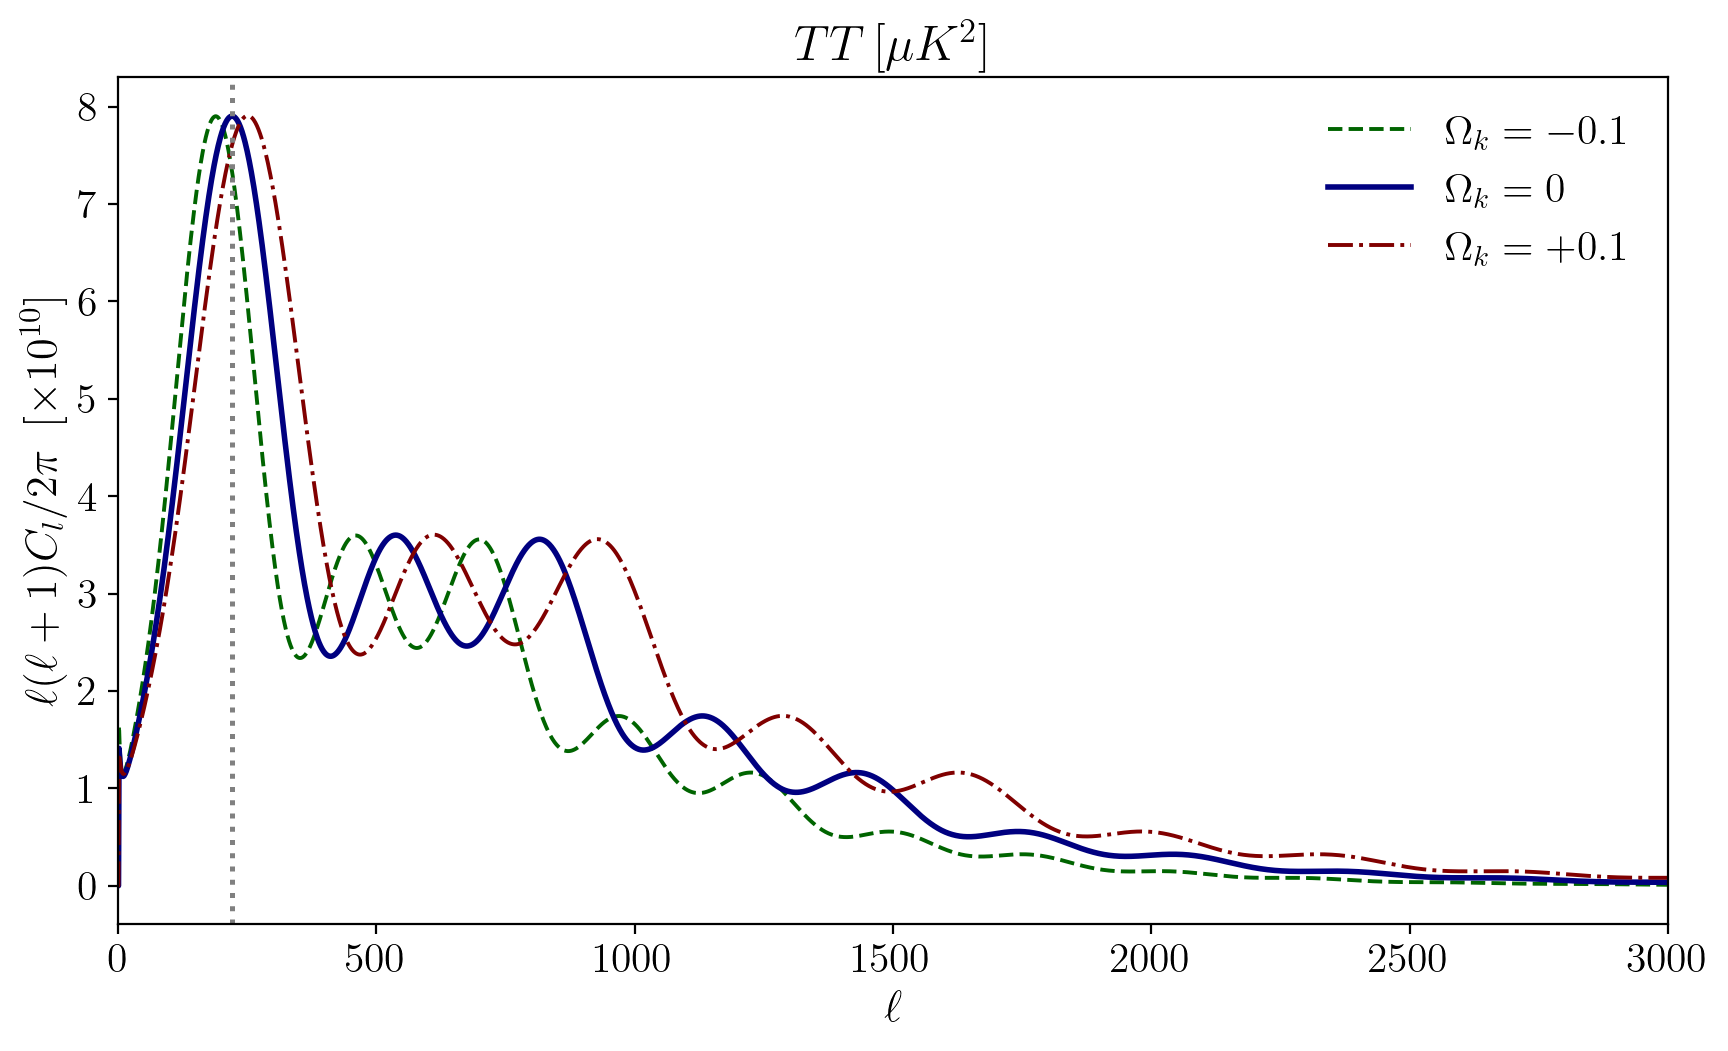

In [5]:
fig, axs = plt.subplots(figsize=(10, 5.5))

axs.set_xlabel(r'$\ell$', size = 16)
axs.set_ylabel(r'$\ell (\ell+1) C_l / 2 \pi \,\,\, [\times 10^{10}]$', size = 16)
axs.set_title(r'$TT\, [\mu K^2]$');

ell = cls_results[0]['ell']
factor = 1.e10*ell*(ell+1.)/2./np.pi

plt.plot(ell,factor*cls_results[-0.1]['tt'], color='darkgreen', ls='--', lw = 1.4, label=r'$\Omega_k = -0.1$')
plt.plot(ell,factor*cls_results[0.0]['tt'], color='navy', lw = 2, label=r'$\Omega_k = 0$')
plt.plot(ell,factor*cls_results[0.1]['tt'], color='maroon', ls='-.', lw = 1.4, label=r'$\Omega_k = +0.1$')

axs.axvline(x=[220], color='grey', lw = 1.8, ls=':') #first peak position (see references below)

axs.set_xlim([0, l_max_scalars]);

leg1 = axs.legend(loc = 'best')
leg1.get_frame().set_linewidth(0.0)

plt.show()

The position of the first peak depends on the spatial curvature of the Universe. The height of the first peak is a measure of the matter density and the relative heights of the other peaks determine the baryon density.

See (ref. https://arxiv.org/pdf/0802.3688.pdf) for a review on CMB, and see (ref 
https://arxiv.org/pdf/1603.03091.pdf) for a computation of the CMB peak locations.

<div style="display: flex; flex-direction: row;">
    <img src="Figs/clbaryon.gif" style="width: 400px; margin-right: 10px;" />
    <img src="Figs/clmatter.gif" style="width: 400px;" />
</div>

Taken from [Wayne Hu](http://background.uchicago.edu/)

**(Left - Baryon Density)**: Increasing the baryon modulates the heights of the peaks.


**(Right - Dark Matter)**: Dark matter increases the total matter content at fixed baryon density. As the dark matter increases the overall amplitude of the peaks decrease due to the elimination of radiation drivingwhereas


## Matter (and cb) power spectra

In [6]:
#Specify k (wavenumber) and z (redshift)
k = np.logspace(np.log10(0.10000E-03), np.log10(10), num=1000) #Mpc^-1
z = 0.


params = {
             'output':'mPk',         
             'omega_b':0.022068385,
             'omega_cdm':0.1209,
             'h':0.6711,
             'A_s':2.13e-09,
             'n_s':0.9624,
             'P_k_max_1/Mpc':10,         #kmax
             'z_max_pk':10.,             #Default value is 10
}

#Initialize the cosmology and compute everything
cosmo = Class()
cosmo.set(params)

start = tm.time()

cosmo.compute()

#linear matter power spectra
Plin = np.array([cosmo.pk_lin(ki * cosmo.h(), z) * cosmo.h()**3 for ki in k])
#for linear cb power spectra, use: "cosmo.pk_cb(...)"

end = tm.time() 
time = end-start
print('Time Pk CLASS =', time, 's')

Time Pk CLASS = 0.15778303146362305 s


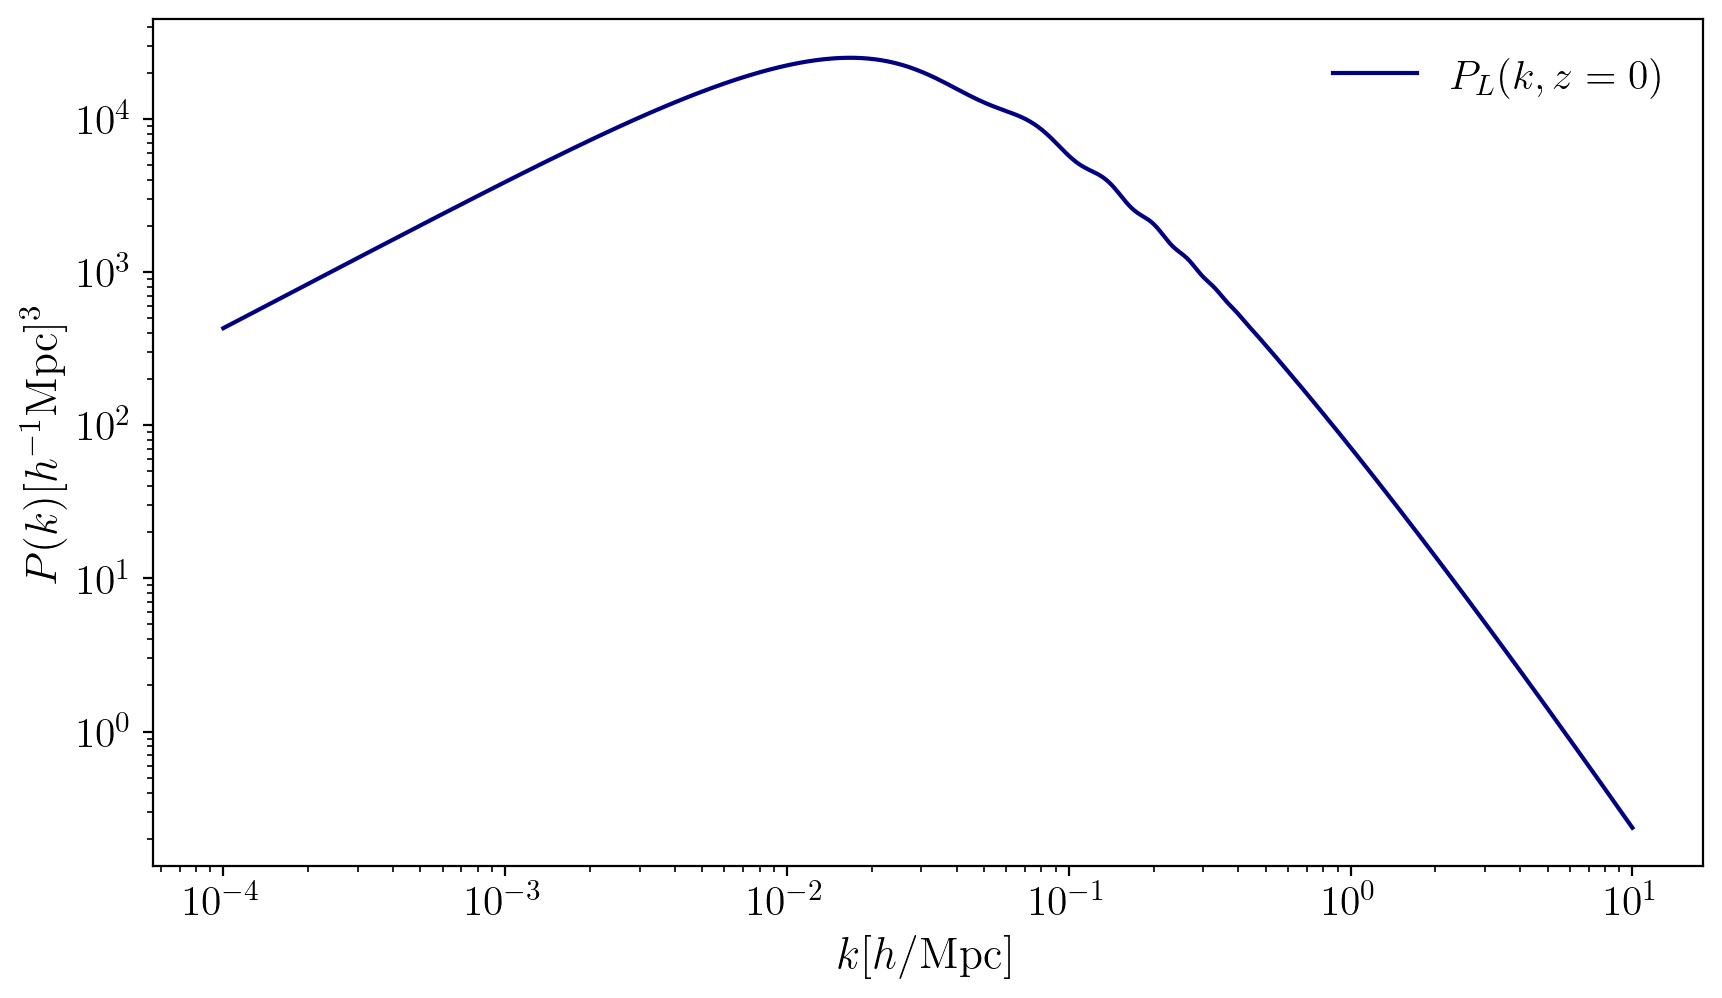

In [7]:
fig, axs = plt.subplots(figsize=(10, 5.5))

axs.set_xlabel(r'$k[h/{\rm Mpc}]$', size = 16)
axs.set_ylabel(r'$P(k) [h^{-1} \rm Mpc]^3$', size = 16)

axs.loglog(k, Plin, color = 'navy', ls='-', label=r'$P_L(k, z=0)$')

leg1 = axs.legend(loc = 'best')
leg1.get_frame().set_linewidth(0.0)

plt.show()

## Linear growth function ($D_+$)

Let's compute the power spectrum for different redshifts.

In [8]:
# Redshifts
z_list = np.array([0.0, 0.3, 0.5])

# Linear power spectra
Plin_list = np.array([[cosmo.pk_lin(ki * cosmo.h(), z) * cosmo.h()**3 for ki in k] for z in z_list])

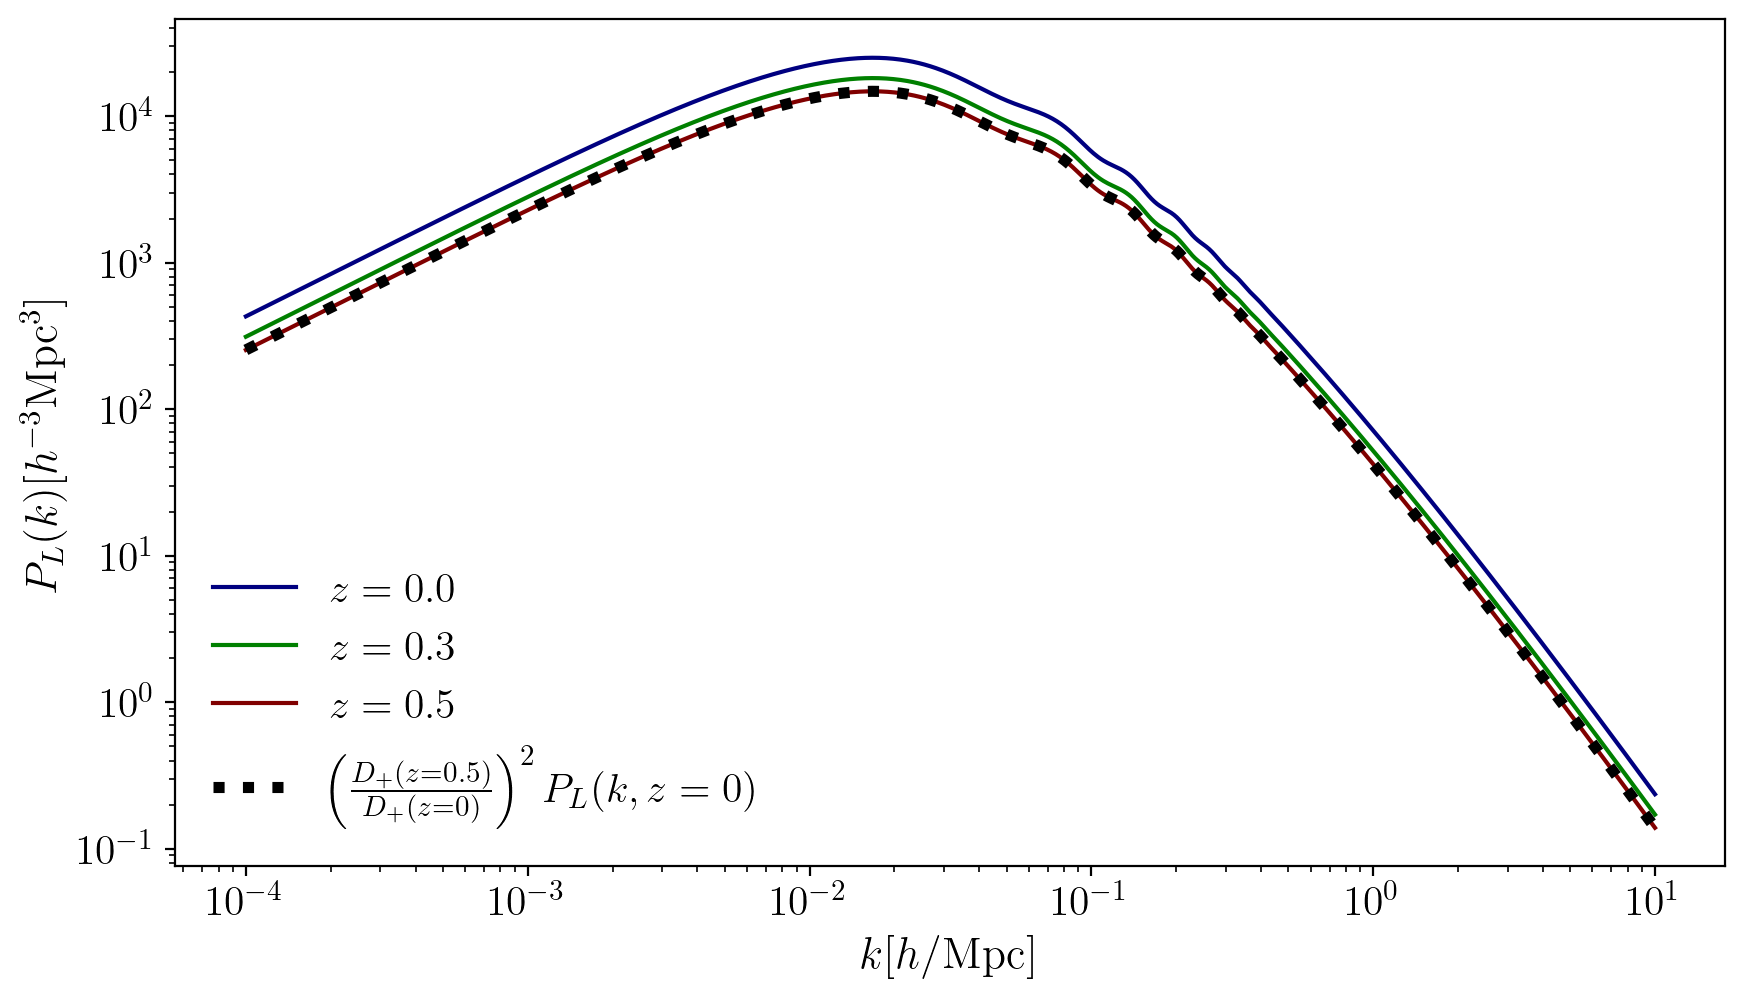

In [9]:
fig, axs = plt.subplots(figsize = (10, 5.5))

axs.set_xlabel(r'$k[h/{\rm Mpc}]$', size = 16)
axs.set_ylabel(r'$P_{L}(k) [h^{-3} \rm Mpc^3]$', size = 16)

# [0]: z=0.0;  [1]: z=0.3;  [2]: z=0.5
axs.loglog(k, Plin_list[0], color = 'navy', label=r'${z = 0.0}$')
axs.loglog(k, Plin_list[1], color = 'g',label=r'${z = 0.3}$')
axs.loglog(k, Plin_list[2], color = 'maroon',label=r'${z = 0.5}$')

axs.loglog(k, Plin_list[0] * 
           (cosmo.scale_independent_growth_factor(0.5)/cosmo.scale_independent_growth_factor(0))**2,
           ls =':', lw =4, color = 'k',label=r'$\left(\frac{D_+(z=0.5)}{D_+(z=0)}\right)^2 P_L(k, z=0)$')

leg1 = axs.legend(loc = 'best')
leg1.get_frame().set_linewidth(0.0)

plt.show()

This becomes important when dealing with different redshift bins (e.g. DESI Y1 contains 6 redshift bins). Instead of rerunning CLASS for each redshift bin, we can rescale the power spectrum, saving significant time!

**Warning:** The approximation may fail for theories that modify the background evolution.

### Exercise: From power spectra to correlation function 

Compute the correlation fuction $\xi(r)$ from the power spectrum $P(k)$ following:


$$\xi(r)=\frac { 1 }{ 2{ \pi  }^{ 2 } } \int { dk k²P(k){ J }_{ 0 } (kr)}$$

$$\xi(r)=\sum _{ i=1 }^{ { N }_{ k } }{ \frac { { k }_{ i }^{ 3 } }{ 2{ \pi  }^{ 2 } } P } \left( { k }_{ i } \right) { J }_{ 0 }\left( { k }_{ i }r \right) \Delta (log{ k }_{ i })$$,

$$k_i \in \{ k_1=k_{min}, k_2, ..., k_{N_k} = k_{max} \}$$

Gaussian filter: ${ e }^{ -b k² }$, being $b$ a constant

In [10]:
from scipy.special import spherical_jn

**Solution using brute force:** very slow. You can use faster methods such as FFTLog

In [11]:
def get_xi(k, Pk, b, rmax):
    
    r = np.linspace(0, rmax, len(k))            #range of r
    N_k = np.linspace(0, len(k), len(k))        #sampling points
    
    delta_log = np.log(k[10]) - np.log(k[9])    #delta
    
    xi = np.zeros(len(k))

    
    def f(kh, r_val):
        return (kh**3)/(2*np.pi**2)*np.exp(-b*kh**2)* spherical_jn(0, kh*r_val)
    
    for jj, r_val in enumerate(r):
        for ii in range(1, len(N_k)):
            xi_val = 0.5*delta_log*(f(k[ii], r_val) + f(k[ii - 1], r_val))*Pk[ii]    #trapezoid rule
            xi[jj] += xi_val
            
    return r, xi

In [12]:
#Pk from CLASS 
def get_pk(kmin, kmax, Nk, z_list):
    
    k = np.logspace(np.log10(kmin), np.log10(kmax), num=Nk) #Mpc^-1
        
    Plin_list = np.array([[cosmo.pk_lin(ki * cosmo.h(), z) * cosmo.h()**3 for ki in k] for z in z_list])
    
    return k , Plin_list

### Looking at the integrand $\frac{k^3}{2\pi^2}P_L(k) j_0 (kr)$

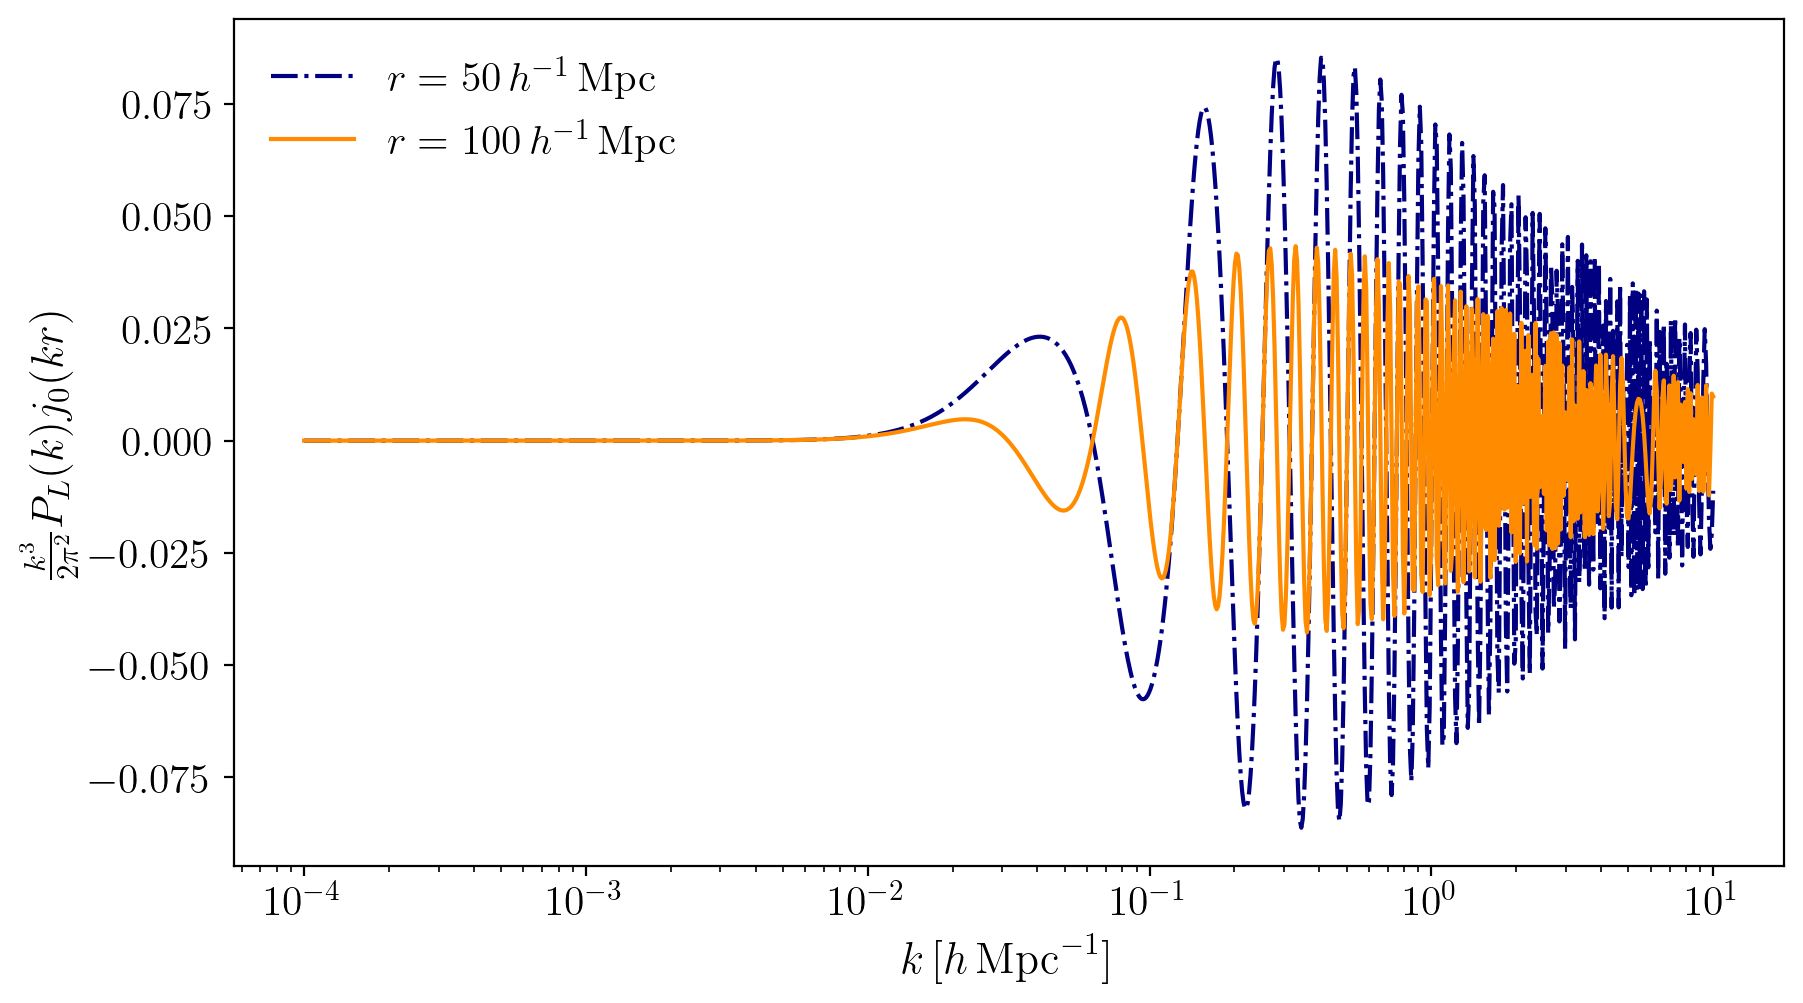

In [13]:
rmax_values = [50, 100] #Mpc/h
delta_k = k**3/(2*np.pi**2) * Plin_list[0] 

fig, axs = plt.subplots(figsize=(10, 5.5))

axs.set_xlabel(r'$k\,[h\,{\rm Mpc}^{-1}]$', size = 16)
axs.set_ylabel(r'$\frac{k^3}{2\pi^2}P_L(k) j_0 (kr)$', size = 16)


plt.semilogx(k, delta_k * spherical_jn(0, k*rmax_values[0]), color = 'navy', ls = '-.', 
             label = r'$r= 50\,h^{-1}\,{\rm Mpc}$')
plt.semilogx(k, delta_k * spherical_jn(0, k*rmax_values[1]), color = 'darkorange', ls = '-',
             label = r'$r= 100\,h^{-1}\,{\rm Mpc}$')

leg1 = axs.legend(loc = 'best')
leg1.get_frame().set_linewidth(0.0)

plt.show()

We should be cautious when integrating due to the presence of numerical issues:

In [14]:
print('Ringing:  is oscillation of a signal')
print('Aliasing: is the overlapping of frequency components')

Ringing:  is oscillation of a signal
Aliasing: is the overlapping of frequency components


### Varying $N_k$

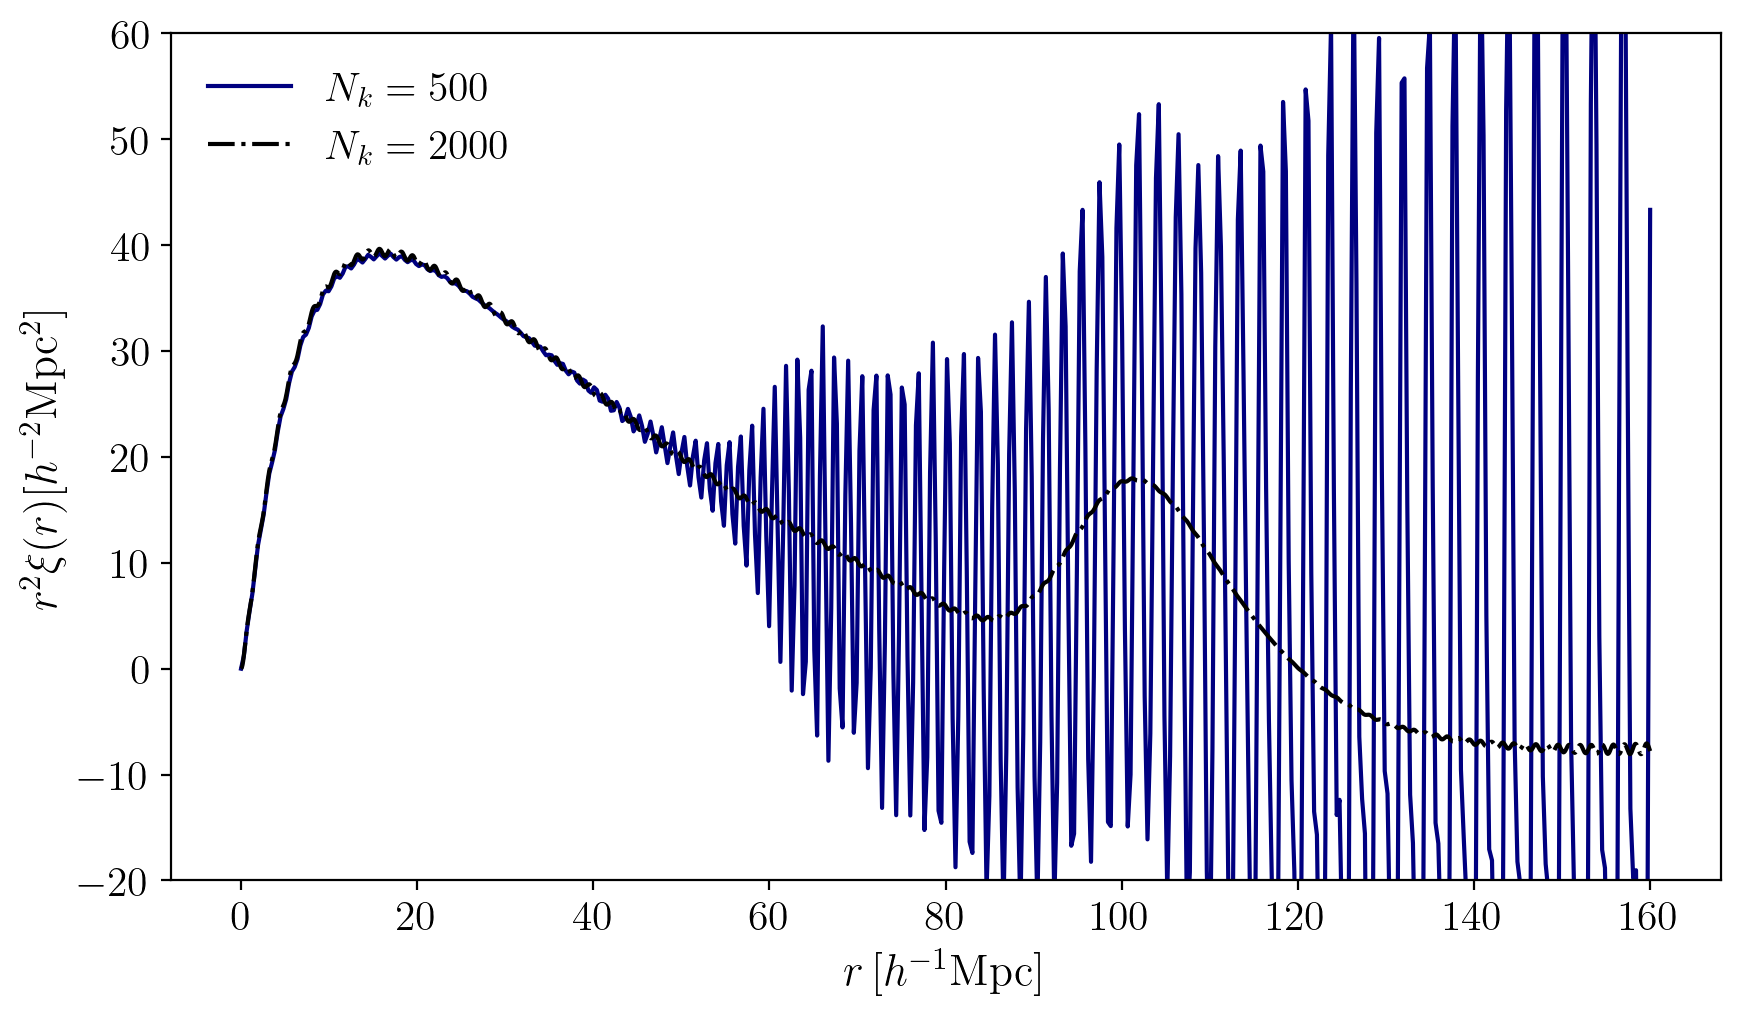

In [15]:
Nk_values = [500, 2000]
colors = ['navy', 'black']

labels = [r'$N_k = 500$', r'$N_k = 2000$']
lsl = ['-', '-.']

fig, axs = plt.subplots(figsize=(10, 5.5))

axs.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', size = 16)
axs.set_ylabel(r'$r^2 \xi(r) [h^{-2} \rm Mpc^2]$', size = 16)

for Nk, color, ls, label in zip(Nk_values, colors, lsl, labels):
    
    k, Plin = get_pk(kmin=1e-4, kmax=5, Nk=Nk, z_list=[0.0])
    r, xi = get_xi(k=k, Pk=Plin[0], b=0, rmax=160)
    axs.plot(r, r**2 * xi, color=color, ls=ls, label=label)

axs.set_ylim([-20, 60])
leg1 = axs.legend(loc = 'best')
leg1.get_frame().set_linewidth(0.0)
plt.show()

**Fewer sampling points** can cause **aliasing** in the signal

###  Varying $k_{max}$ (with $N_k = 2000$)

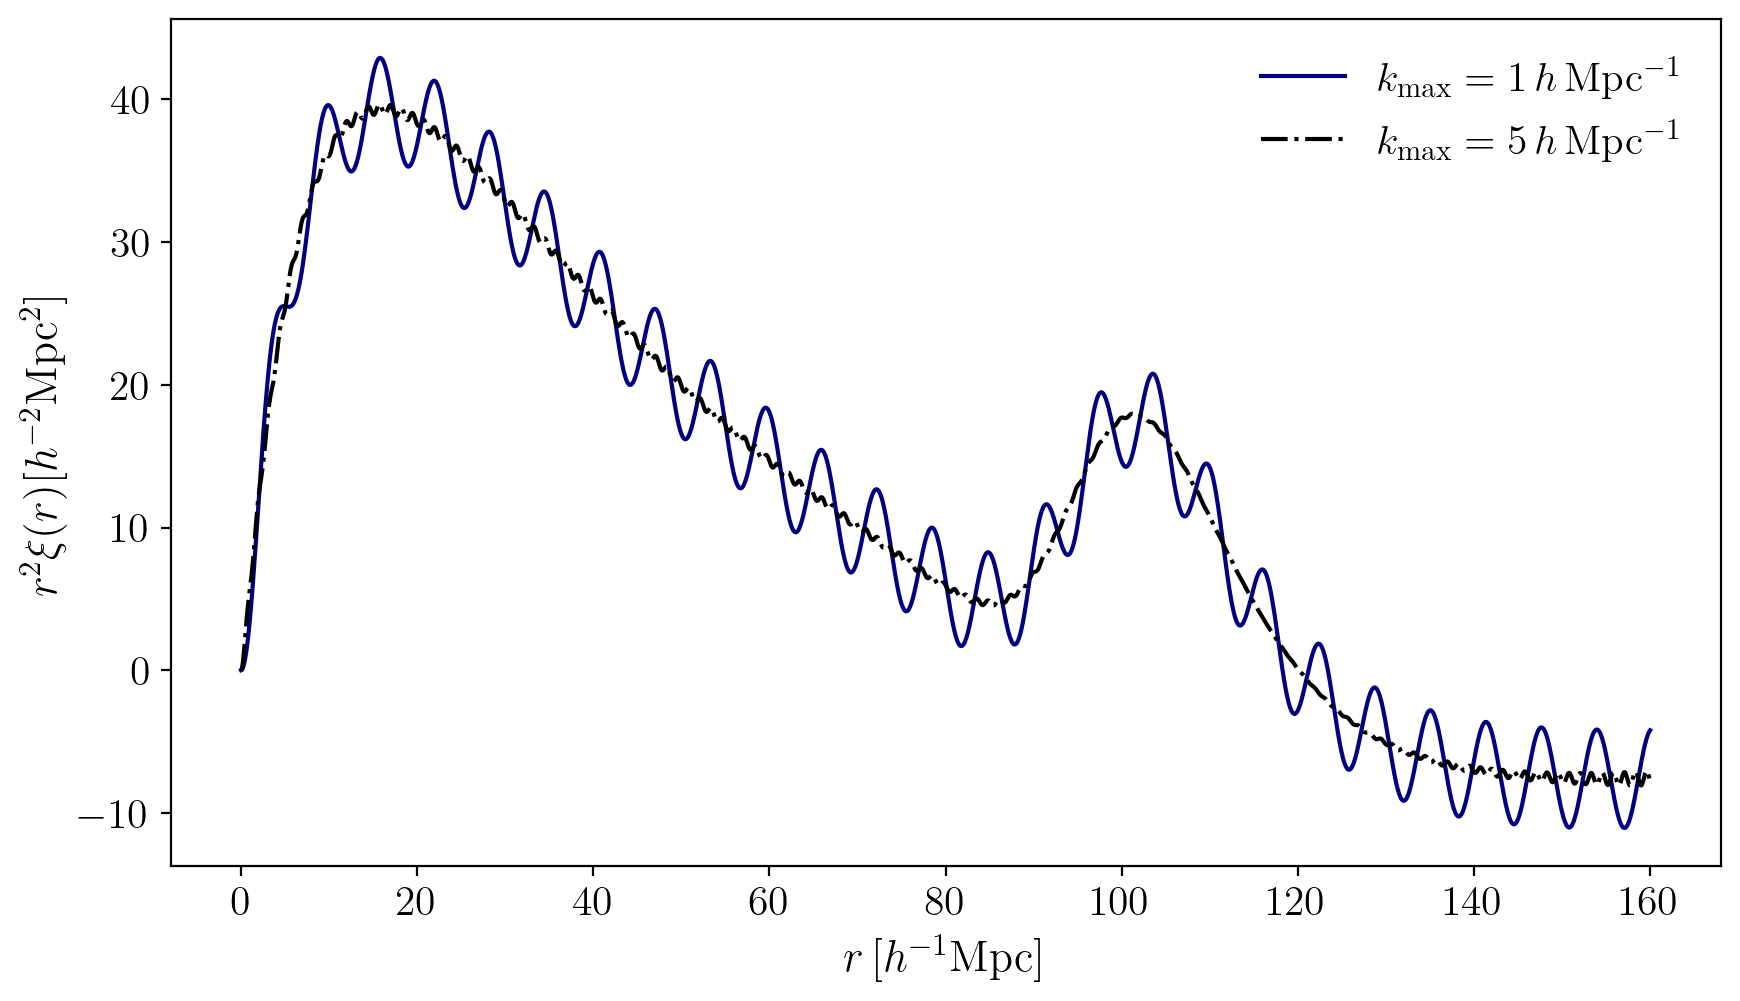

In [16]:
kmax_values = [1, 5]
colors = ['navy', 'black']
labels = [r'$k_{\rm max} = 1\, h\,{\rm Mpc^{-1}}$', r'$k_{\rm max} = 5\, h\,{\rm Mpc^{-1}}$']
lsl = ['-', '-.']

fig, axs = plt.subplots(figsize=(10, 5.5))

axs.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', size = 16)
axs.set_ylabel(r'$r^2 \xi(r) [h^{-2} \rm Mpc^2]$', size = 16)

for kmaxs, color, ls, label in zip(kmax_values, colors, lsl, labels):
    
    k, Plin = get_pk(kmin=1e-4, kmax=kmaxs, Nk=2000, z_list=[0.0])
    r, xi = get_xi(k=k, Pk=Plin[0], b=0, rmax=160)
    axs.plot(r, r**2 * xi, color=color, ls=ls, label=label)

leg1 = axs.legend(loc = 'best')
leg1.get_frame().set_linewidth(0.0)

plt.show()

Lower $k_{max}$ can cause **ringing**

### Anti-alising kernel: $W(k) = e^{-bk^2}$ with ($N_k = 2000$ &  $k_{max} = 0.5$)

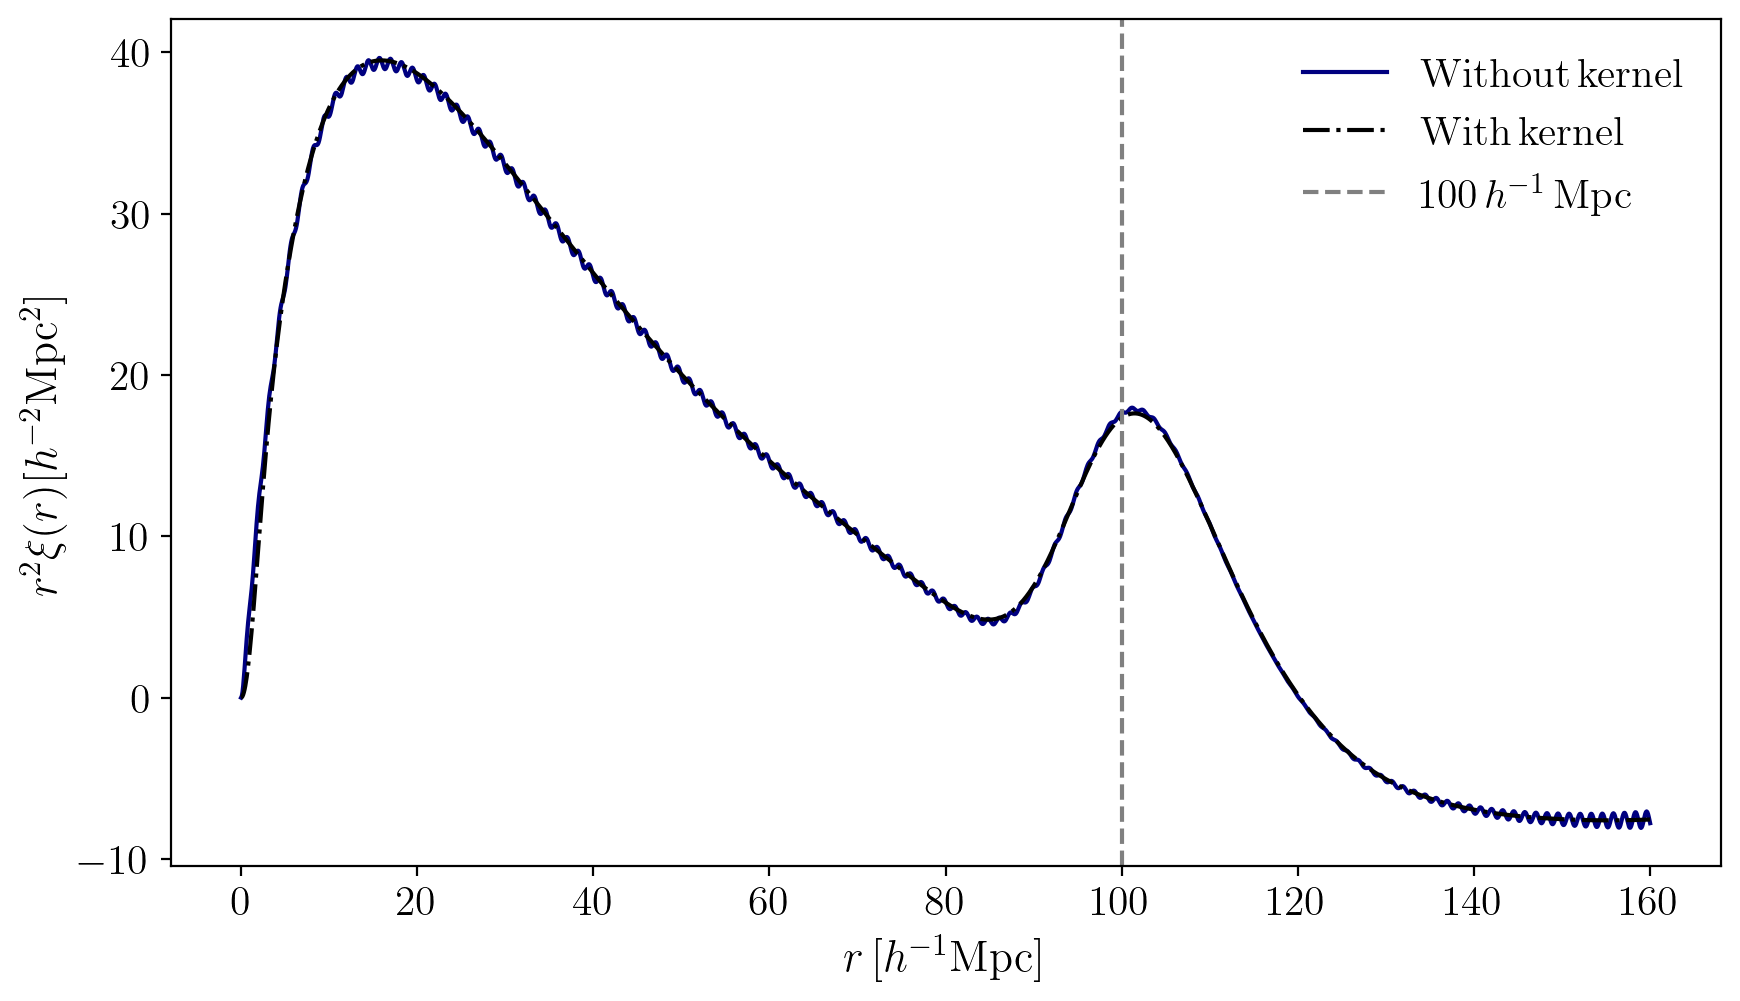

In [17]:
b_values = [0, 1]
colors = ['navy', 'black']
labels = [r'${\rm Without\, kernel}$', r'${\rm With\, kernel}$']
lsl = ['-', '-.']

fig, axs = plt.subplots(figsize=(10, 5.5))

axs.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', size = 16)
axs.set_ylabel(r'$r^2 \xi(r) [h^{-2} \rm Mpc^2]$', size = 16)

for bs, color, ls, label in zip(b_values, colors, lsl, labels):
    
    k, Plin = get_pk(kmin=1e-4, kmax=5, Nk=2000, z_list=[0.0])
    r, xi = get_xi(k=k, Pk=Plin[0], b=bs, rmax=160)
    axs.plot(r, r**2 * xi, color=color, ls=ls, label=label)

axs.axvline(x=100, color='grey', linestyle='--', label=r'$100\,h^{-1}\,{\rm Mpc}$')
    
leg1 = axs.legend(loc = 'best')
leg1.get_frame().set_linewidth(0.0)

plt.show()

## Neutrinos: suppression (additional scale)

<div style="display: flex; flex-direction: row;">
    <img src="Figs/neutrinos.png" style="width: 800px" />
</div>

Taken from [A. Shankar and H. Feldman (2012)](https://arxiv.org/pdf/1006.0689)

In [18]:
z = 0.5

omega_ncdm_values = [0.0, 0.00429, 0.00429/2, 0.00429/4]                                  #massive neutrinos
omega_cdm_values = [0.1209, 0.1209 - 0.00429, 0.1209 - 0.00429/2, 0.1209 - 0.00429/4]     #cold dark matter
Plin_values = []
Plin_cb_values = []
cosmo_values = []

for omega_ncdm, omega_cdm in zip(omega_ncdm_values, omega_cdm_values):
    params = {
             'output':'mPk',
             'omega_b':0.022068385,
             'omega_cdm':omega_cdm,
             'omega_ncdm':omega_ncdm, 
             'h':0.6711,
             'A_s':2.74e-09,
             'n_s':0.9624,
             'P_k_max_1/Mpc':10, #kmax
             'z_max_pk':10.,     #Default value is 10
             'N_ur':2.046,       #massless neutrinos
             'N_ncdm':1          #massive neutrinos species
             
}
    
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    
    k = np.logspace(np.log10(0.10000E-03), np.log10(10), num=1000) #Mpc^-1

    Plin = np.array([cosmo.pk_lin(ki * cosmo.h(), z) * cosmo.h()**3 for ki in k])
    Plin_cb = np.array([cosmo.pk_cb(ki * cosmo.h(), z) * cosmo.h()**3 for ki in k])
    
    Plin_values.append(Plin)
    Plin_cb_values.append(Plin_cb)
    cosmo_values.append(cosmo)

In [19]:
cosmo_values[0].Omega0_m()/cosmo_values[1].Omega0_m()

1.0000000890857446

The total matter is (almost) the same!

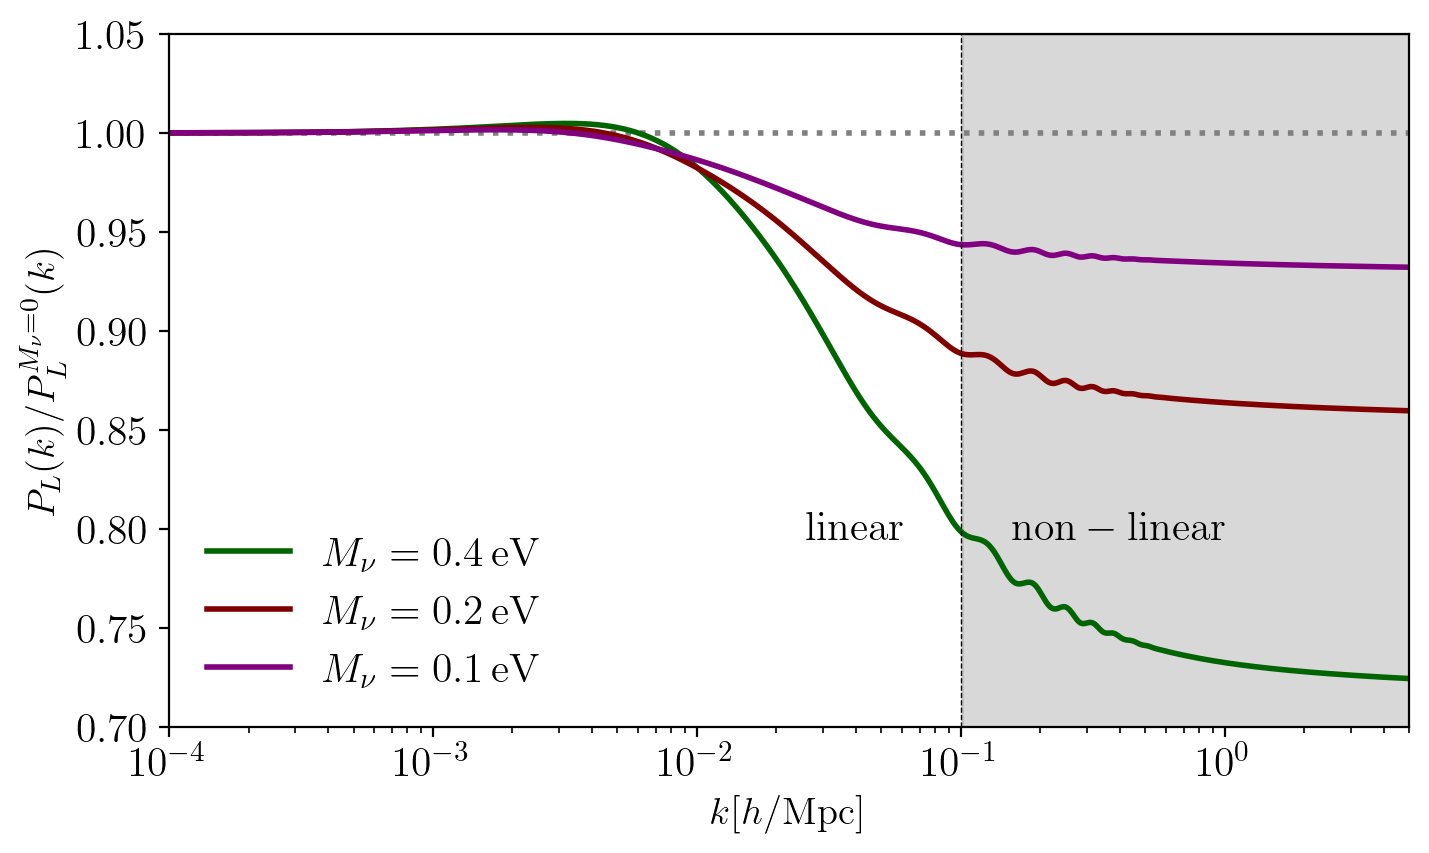

In [20]:
fig, axs = plt.subplots(1, figsize=(8,4.5))

axs.set_xlabel(r'$k[h/{\rm Mpc}]$', size = 14);
axs.set_ylabel(r'$P_L(k)/P^{M_\nu = 0}_L(k) $', size = 14);

axs.semilogx(k, Plin_values[0]/Plin_values[0] ,color = 'grey', ls=':', lw = 2);

axs.semilogx(k, Plin_values[1]/Plin_values[0] ,color = 'darkgreen', label=r'$M_\nu = 0.4\, {\rm eV}$', lw = 2)
axs.semilogx(k, Plin_values[2]/Plin_values[0] ,color = 'maroon', label=r'$M_\nu = 0.2\, {\rm eV}$', lw = 2)
axs.semilogx(k, Plin_values[3]/Plin_values[0] ,color = 'purple', label=r'$M_\nu = 0.1\, {\rm eV}$', lw = 2)

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);


axs.set_xlim([1e-4, 5.0])
axs.set_ylim([0.70, 1.05])

plt.axvline(0.1, ls = '--', color ='k', lw = 0.5)
plt.text(0.04, 0.8, r'${\rm linear}$', fontsize=15, ha='center', va='center')
plt.text(0.4, 0.8, r'${\rm non-linear}$', fontsize=15, ha='center', va='center')
axs.fill_between(k, 0.70, 1.05, where=(k > 0.1), color='gray', alpha=0.3)

plt.show()

We can **indirectly extract cosmological information about the total neutrino mass**!!!!

Non-linear scales become important for extracting information about neutrino mass.

SEE **JORGE'S TALK ON FRIDAY**!!

# 2. Redshift Space Distortions (RSD)

<div style="display: flex; flex-direction: row;">
    <img src="Figs/RSD.png" style="width: 900px;" />
</div>

### Linear Kaiser power spectrum

$$P^{K, L}_s = (1 + \beta \mu^2)^2 b^2_1 P_L(k) $$

where $\beta = f/b_1$

$$P^{K, L }_\ell = \frac{2\ell+1}{2} \int^{1}_{-1} P^{K, L}_s(k, \mu)\, \mathcal{L}_\ell({\mu})$$

with the Legendre polynomials ($\mathcal{L}_\ell$):

$$\mathcal{L}_{\ell = 0 } = 1,\quad  \mathcal{L}_{\ell = 2 } = \frac{3}{2}\left(\mu^2 - \frac{1}{3}\right),\quad \mathcal{L}_{\ell = 4 } = \frac{1}{8}\left(35\mu^4 - 30\mu^2 + 3 \right)$$

We obatin

$$P^{K, L}_0 (k) = \left(1 + \frac{2}{3}\beta + \frac{1}{5} \beta^2\right) b^2_1 P_L(k),$$
$$P^{K, L}_2 (k) = \left(\frac{4}{3}\beta + \frac{4}{7} \beta^2\right) b^2_1 P_L(k),$$
$$P^{K, L}_4 (k) = \frac{8}{35}\beta^2 b^2_1 P_L(k)$$

In [21]:
kmax = 0.20   #maximum wavenumber: PT starts failing for larger

#load the data
k_data, p0_data, p2_data, p4_data, sigma0_data, sigma2_data, sigma4_data = np.loadtxt('Data/Mnu0p4_z0p5_cb_RSD.txt', unpack = True) 
krange = np.where((k_data < kmax))

kr = k_data[krange]
PshotP = 1/0.0002118763;
pl0_data = p0_data[krange] - PshotP
pl2_data = p2_data[krange]
sigmal0_data = sigma0_data[krange]
sigmal2_data = sigma2_data[krange]

In [22]:
def get_linear_kaiser_multipoles(b, f, pkl):
    
    beta = f/b     
    
    P0 = (1 + 2/3 * beta + 1/5 * beta**2) * b**2 * pkl
    
    P2 = (4/3 * beta + 4/7 * beta**2) * b**2 * pkl
    
    P4 = 8/35 * beta**2 * b**2 * pkl
    
    return P0, P2, P4

For simplicity **we only fit $f\, \&\, b$ while keeping the cosmological parameters fixed to the $\it fiducial\,cosmology$** (i.e. cosmological parameters employed to created the simulations $\rightarrow P_L(k)$ fixed)

#### Effect of $b$ on the power spectra

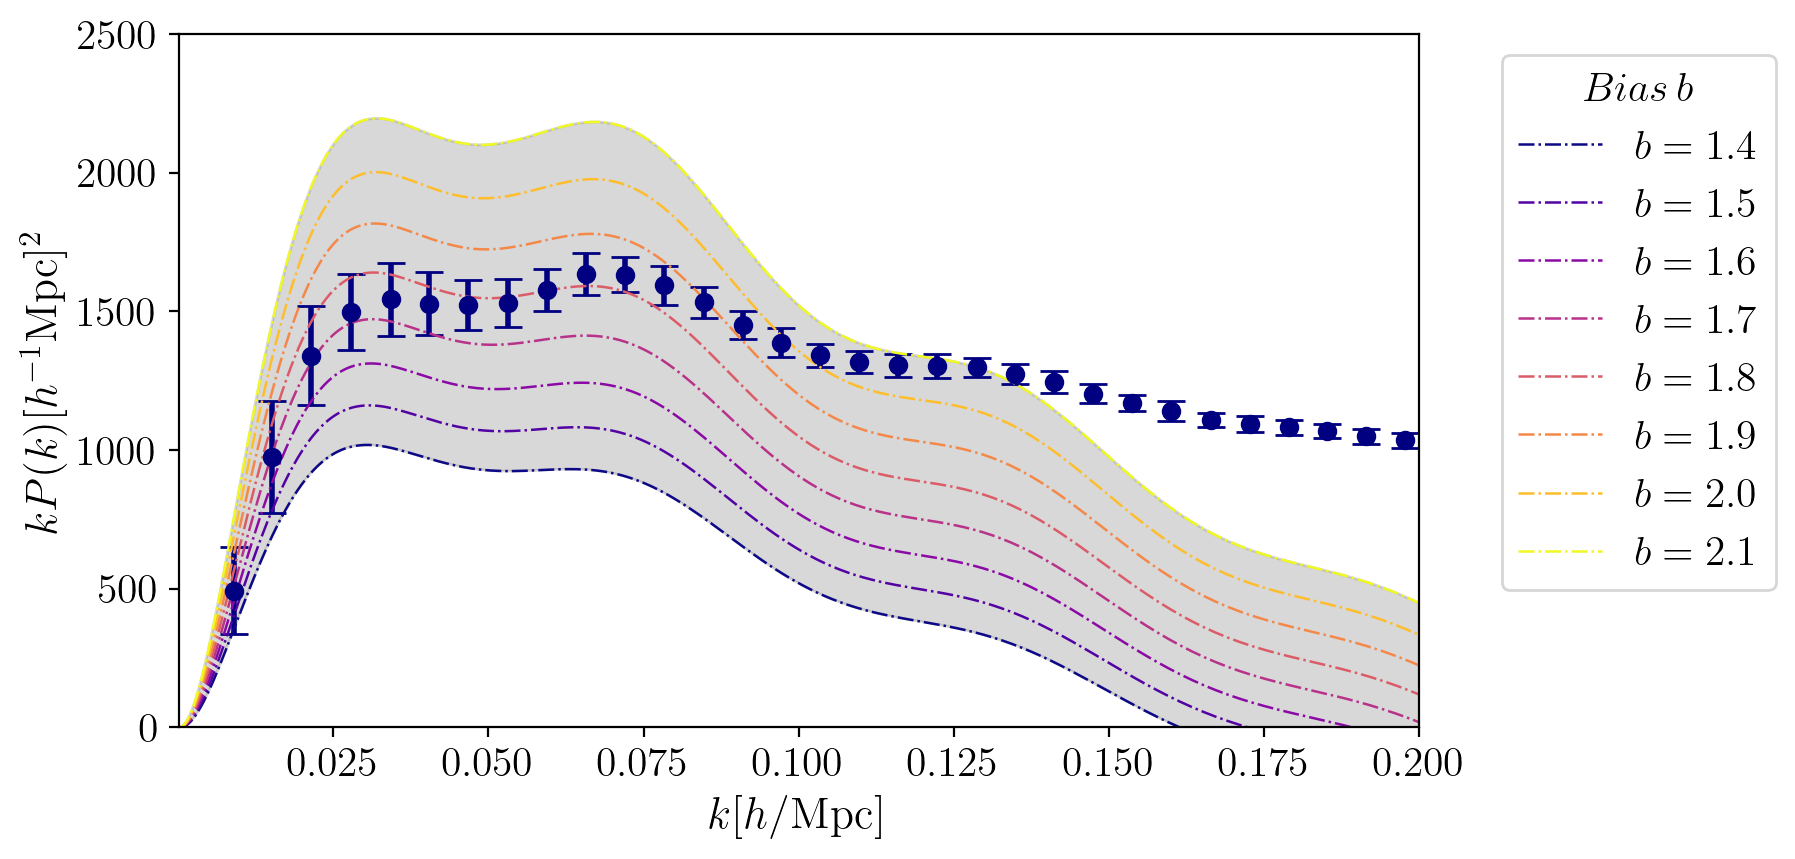

In [23]:
fig, axs = plt.subplots(1, figsize=(8,4.5))

axs.set_xlabel(r'$k[h/{\rm Mpc}]$', size = 16)
axs.set_ylabel(r'$k P(k) [h^{-1} \rm Mpc]^2$', size = 16)

axs.errorbar(kr, kr*pl0_data, yerr = kr*sigmal0_data, color = 'navy', ecolor='navy', fmt='o', 
             capsize = 5, lw = 2)

b_values = np.arange(1.4, 2.1, 0.1)   #bias
colors = plt.cm.plasma(np.linspace(0, 1, len(b_values)))
P0_min = np.inf * np.ones_like(k)
P0_max = -np.inf * np.ones_like(k)

for i, b in enumerate(b_values):
    P0_Lkaiser, P2_Lkaiser, P4_Lkaiser = get_linear_kaiser_multipoles(b=b, f=0.748, pkl=Plin_cb_values[1])
    axs.plot(k, k * (P0_Lkaiser - PshotP), color=colors[i], label=f'$b = {b:.1f}$', ls = '-.', lw = 0.9)
    P0_min = np.minimum(P0_min, P0_Lkaiser)
    P0_max = np.maximum(P0_max, P0_Lkaiser)

axs.legend(title=r'$Bias\,b$', bbox_to_anchor=(1.05, 1), loc='upper left')
axs.fill_between(k, k * (P0_min -PshotP), k * (P0_max -PshotP), color='gray', alpha=0.3)


axs.set_xlim([1e-4, 0.2])
axs.set_ylim([0, 2.5e3])

plt.show()

#### Effect of $f$ on the power spectra

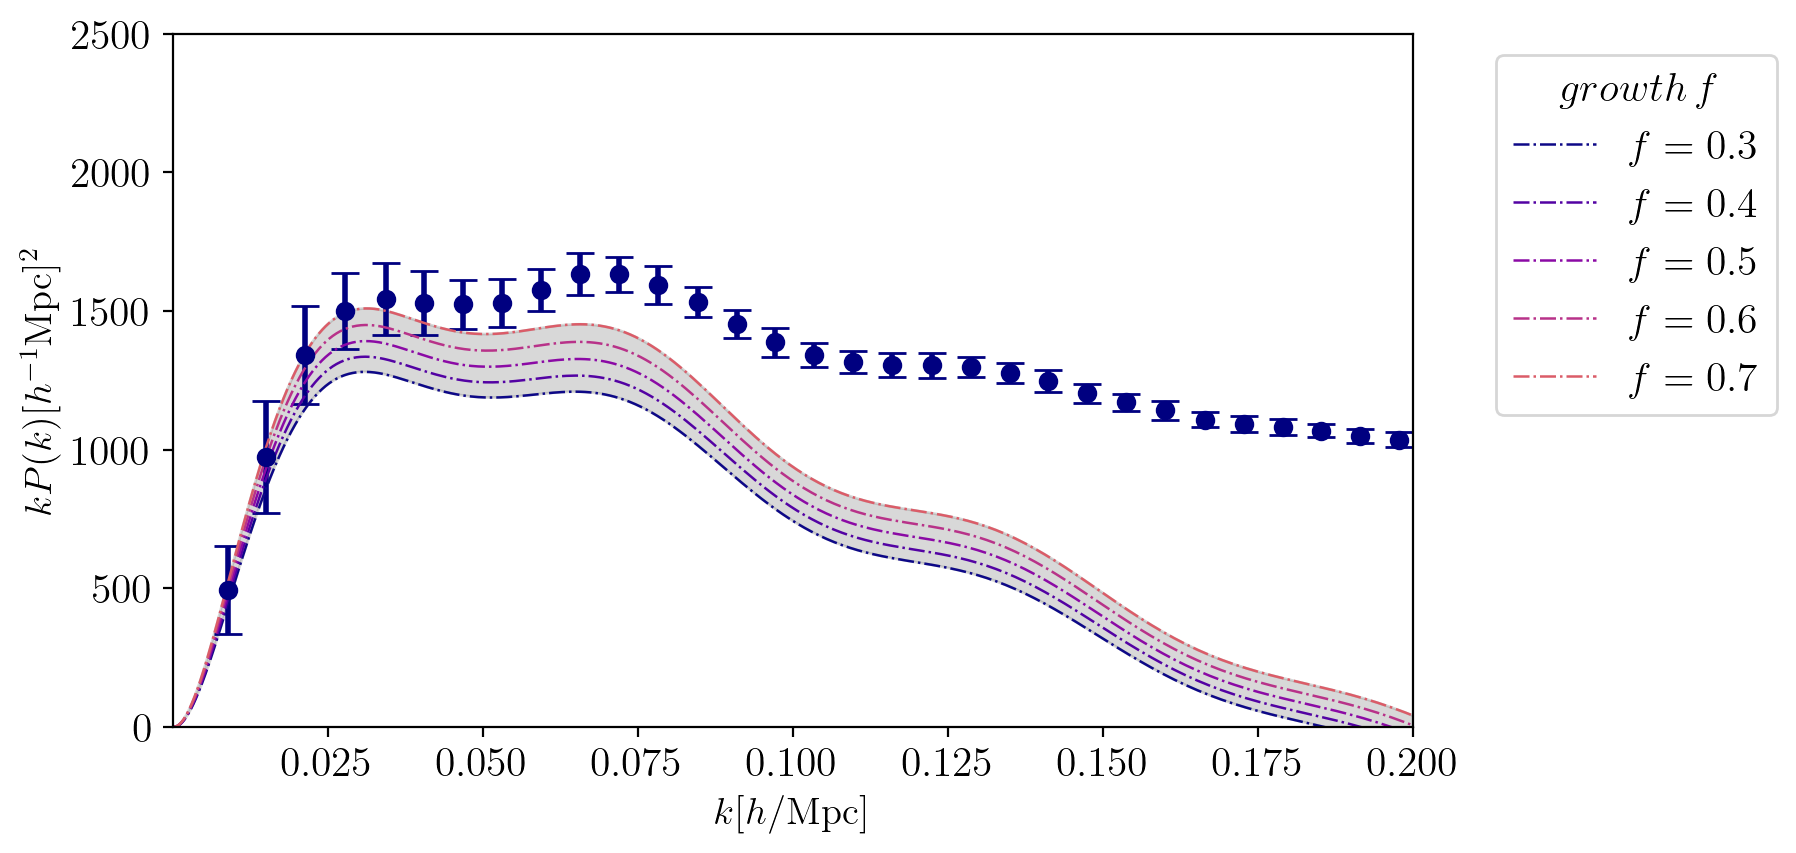

In [24]:
fig, axs = plt.subplots(1, figsize=(8,4.5))

axs.set_xlabel(r'$k[h/{\rm Mpc}]$', size = 14)
axs.set_ylabel(r'$k P(k) [h^{-1} \rm Mpc]^2$', size = 14)

axs.errorbar(kr, kr*pl0_data, yerr = kr*sigmal0_data, color = 'navy', ecolor='navy', fmt='o', 
             capsize = 5, lw = 2)

f_values = np.arange(0.3, 0.8, 0.1)
colors = plt.cm.plasma(np.linspace(0, 1, len(b_values)))
P0_min = np.inf * np.ones_like(k)
P0_max = -np.inf * np.ones_like(k)

for i, f in enumerate(f_values):
    P0_Lkaiser, P2_Lkaiser, P4_Lkaiser = get_linear_kaiser_multipoles(b=1.74, f=f, pkl=Plin_cb_values[1])
    axs.plot(k, k * (P0_Lkaiser - PshotP), color=colors[i], label=f'$f = {f:.1f}$', ls = '-.', lw = 0.9)
    P0_min = np.minimum(P0_min, P0_Lkaiser)
    P0_max = np.maximum(P0_max, P0_Lkaiser)

axs.legend(title=r'$growth\, f$', bbox_to_anchor=(1.05, 1), loc='upper left')
axs.fill_between(k, k * (P0_min -PshotP), k * (P0_max -PshotP), color='gray', alpha=0.3)


axs.set_xlim([1e-4, 0.2])
axs.set_ylim([0, 2.5e3])

plt.show()

#### Fitting the monopole 

In [25]:
def Kaiser_P0(b, f, kev, k, pkl):  
    from scipy import interpolate
    
    beta = f/b   
    P = interpolate.interp1d(k, pkl, kind = 'cubic', fill_value = "extrapolate")
    PkL = P(kev)
    P0 = (1 + 2/3 * beta + 1/5 * beta**2) * b**2 * PkL
    
    return P0 

def log_likelihood(theta):
    b, f = theta
    model = Kaiser_P0(b, f, kev=kr, k=k, pkl=Plin_values[1])
    sigma2 = sigmal0_data**2
    
    return -0.5 * np.sum((pl0_data - model) ** 2 / sigma2 )

In [26]:
from scipy.optimize import minimize

nll = lambda *args: -log_likelihood(*args)

start = np.array([3, 0.5])
soln = minimize(nll, start)
b_best, f_best = soln.x[:2]
print('b_best = ', b_best)
print('f_best = ', f_best)

b_best =  1.8639861681015337
f_best =  0.42999402757611044


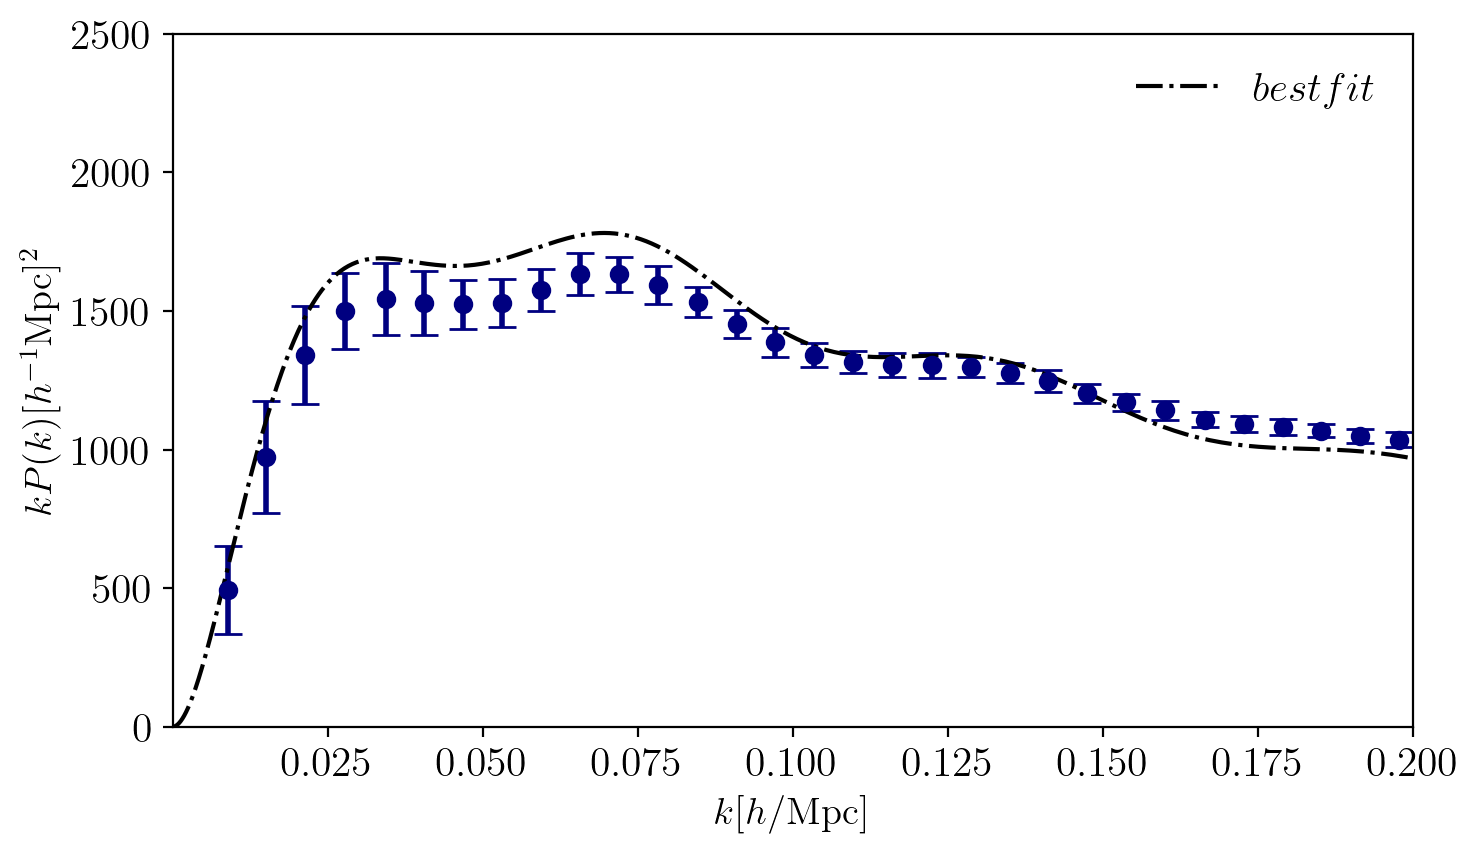

In [27]:
fig, axs = plt.subplots(1, figsize=(8,4.5))

axs.set_xlabel(r'$k[h/{\rm Mpc}]$', size = 14)
axs.set_ylabel(r'$k P(k) [h^{-1} \rm Mpc]^2$', size = 14)

axs.errorbar(kr, kr*pl0_data, yerr = kr*sigmal0_data, color = 'navy', ecolor='navy', fmt='o', 
             capsize = 5, lw = 2)


P0_Lkaiser, P2_Lkaiser, P4_Lkaiser = get_linear_kaiser_multipoles(b=1.86398617, f=0.42999403, pkl=Plin_values[1])
axs.plot(k, k * P0_Lkaiser, color='k', label=r'$bestfit$', ls = '-.', lw = 1.5)

axs.set_xlim([1e-4, 0.2])
axs.set_ylim([0, 2.5e3])

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()

The linear Kaiser power spectrum does not provide an accurate description

## 3. FOLPS

[FOLPS](https://github.com/henoriega/FOLPS-nu/tree/39f65efa31420b7416814704d1ca86f185d35339): Python code that computes the galaxy redshift space power spectrum for cosmologies containing massive neutrinos.

[FOLPSax](https://github.com/cosmodesi/folpsax/tree/main): JAX version

These codes are included in the official [desilike](https://github.com/cosmodesi/desilike) package.

<div style="display: flex; flex-direction: row;">
<img src="Figs/folpsax_logo.png" style="width: 900px;" />
</div>

In [28]:
!git clone https://github.com/henoriega/FOLPS-nu.git

fatal: destination path 'FOLPS-nu' already exists and is not an empty directory.


In [29]:
sys.path.append('FOLPS-nu/')
import FOLPSnu as FOLPS

### Computing RSD multipoles

In [30]:
#omega_i = Omega_i h² 
omega_b = cosmo_values[1].omega_b()        
omega_cdm = cosmo_values[1].Omega0_cdm() * cosmo_values[1].h()**2      
omega_ncdm = cosmo_values[1].Omega_nu * cosmo_values[1].h()**2
h = cosmo_values[1].h()
z_pk = 0.5;                 
CosmoParams = [z_pk, omega_b, omega_cdm, omega_ncdm, h]

In [31]:
inputpkT = k, Plin_cb_values[1]

In [32]:
#bias parameters
b1 = 1.645;                 
b2 = -0.46;                 
bs2 = -4/7*(b1 - 1);        
b3nl = 32/315*(b1 - 1);  

#EFT parameters
alpha0 = 3;                 #units: [Mpc/h]^2
alpha2 = -28.9;             #units: [Mpc/h]^2
alpha4 = 0.0;               #units: [Mpc/h]^2
ctilde = 0.0;               #units: [Mpc/h]^4

#Stochatics parameters
alphashot0 = 0.08;          
alphashot2 = -8.1;          #units: [Mpc/h]^2      
PshotP = 1/0.0002118763;    #units: [Mpc/h]^3
NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alphashot0, alphashot2, PshotP]

In [33]:
matrices = FOLPS.Matrices()

N = 128 sampling points
M matrices have been computed


In [34]:
nonlinear = FOLPS.NonLinear(inputpkT, CosmoParams)

In [35]:
k_ev = np.logspace(np.log10(0.01), np.log10(0.3), num = 50) # array of evaluation [h/Mpc]

In [36]:
kh, Pkl0, Pkl2, Pkl4 = FOLPS.RSDmultipoles(k_ev, NuisanParams)

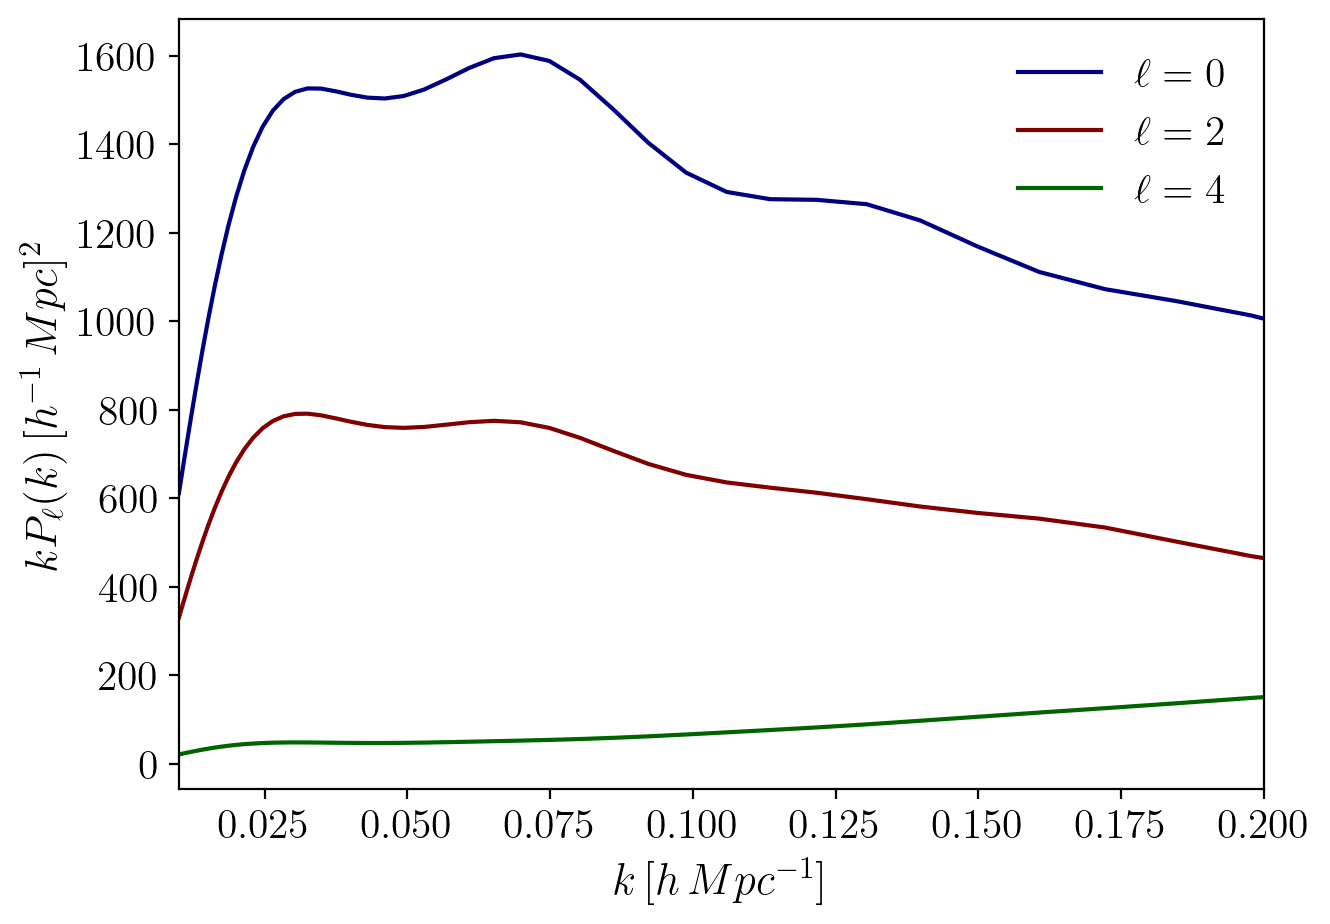

In [37]:
fig, axs = plt.subplots(figsize=(7,5))
axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  16)
axs.set_ylabel(r'$k P_{\ell}(k) \, [h^{-1} \,  Mpc]^2$', fontsize =  16)

axs.plot(kh, kh * Pkl0, color = 'navy', ls='-', label=r'$\ell = 0$')
axs.plot(kh, kh * Pkl2, color = 'maroon', ls='-', label=r'$\ell = 2$')
axs.plot(kh, kh * Pkl4, color = 'darkgreen', ls='-', label=r'$\ell = 4$')

axs.set_xlim([kh[0], 0.2])

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()

### Non-linear contributions

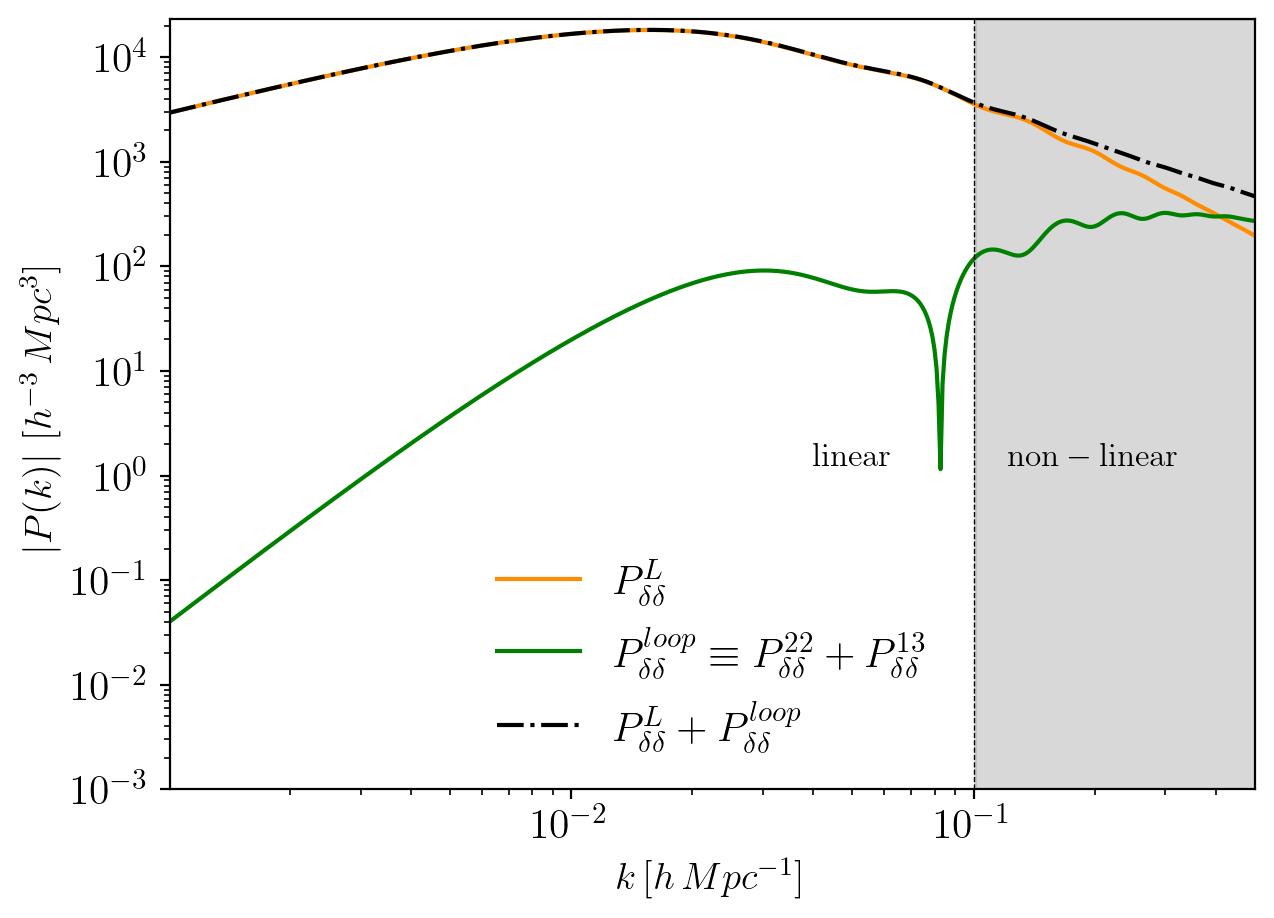

In [38]:
# 1-loop contributions
krange = FOLPS.TableOut[0]; 
Plinear = FOLPS.TableOut[1];
Ploop_dd = FOLPS.TableOut[3]; 


fig, axs = plt.subplots(figsize = (7, 5))

axs.loglog(krange, Plinear, color = 'darkorange', ls='-',label=r'$P^L_{\delta \delta}$')

axs.loglog(krange, np.abs(Ploop_dd), color = 'green', ls='-',
           label=r'$P^{loop}_{\delta \delta} \equiv P^{22}_{\delta \delta} + P^{13}_{\delta \delta}$')

axs.loglog(krange, Plinear + np.abs(Ploop_dd), color = 'k', ls='-.', 
           label=r'$P^L_{\delta \delta} + P^{loop}_{\delta \delta}$')


axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$|P(k)|$  $[h^{-3} \, Mpc^{3}]$', fontsize =  14)
axs.set_xlim([krange[0], krange[-1]]);
axs.set_ylim([1e-3, 2.3e4]);

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.axvline(0.1, ls = '--', color ='k', lw = 0.5)
plt.text(0.05, 1.5, r'${\rm linear}$', fontsize=12, ha='center', va='center')
plt.text(0.2, 1.5, r'${\rm non-linear}$', fontsize=12, ha='center', va='center')
axs.fill_between(krange, 1e-3, 2.3e4, where=(krange > 0.1), color='gray', alpha=0.3)


plt.show()

### FastFit

In [39]:
def generate_ps(h = 0.6711, ombh2 = 0.022, omch2 = 0.122, omnuh2 = 0.0006442, 
                As = 2e-9, ns = 0.965, z = 0.97, N_ur = 2.0328,
                khmin = 0.0001, khmax = 2.0, nbk = 1000):
    '''Generates the linear (cb) power spectrum using Class.
    
    Args:
        h = H0/100, with H0 the Hubble constant,
        omXh2: Omega_X h², where X = b (baryons), c (CDM), nu (neutrinos),
        As: amplitude of primordial curvature fluctuations,
        ns: spectral index,
        z: redshift,
        khmin, khmax: minimal and maximal wave-number,
        nbk: number of points in [khmin, khmax].
        
    Rertuns:
        kh: vector of wave-number,
        pk: linear (cb) power spectrum,
    '''
    
    params = {
             'output':'mPk',
             'omega_b':ombh2,
             'omega_cdm':omch2,
             'omega_ncdm':omnuh2, 
             'h':h,
             'A_s':As,
             'n_s':ns,
             'P_k_max_1/Mpc':khmax,
             'z_max_pk':10.,         #Default value is 10 
             #'N_eff':Neff,
             'N_ur':N_ur,            #massless neutrinos 
             'N_ncdm':1              #massive neutrinos species
             }
    
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    
    #Specify k
    k = np.logspace(np.log10(khmin*h), np.log10(khmax*h), num = nbk) #Mpc^-1
    
    #Computes the linear (cb) power spectrum
    Plin = np.array([cosmo.pk_cb(ki, z) for ki in k])
    
    #Tranforming to h/Mpc and (Mpc/h)^3
    k /= h
    Plin *= h**3
    
    return({'kh':k, 'pk':Plin})

In [40]:
def Fastfit(k_ev, *params):
    h = params[0]
    omega_cdm = params[1]
    logA_s = params[2]
    b1 = params[3]
    b2 = params[4]
    alpha0 = params[5]
    alpha4 = params[6]
    alphashot0 = params[7]
    alphashot2 = params[8]
    
    print(params)
    
    # Cosmo params
    # Omega_i = w_i/h² , w_i: omega_i
    omega_b = cosmo_values[1].omega_b()      
    Mnu = 0.4                             
    omega_ncdm = Mnu/93.14
    As = np.exp(logA_s)/(10**10)
    ns = 0.9624;                          
    
    z_pk = 0.5;                            
    CosmoParams = [z_pk, omega_b, omega_cdm, omega_ncdm, h]
    
    # Nuisance params
    bs2 = -4/7*(b1 - 1);      
    b3nl = 32/315*(b1 - 1);
    alpha4 = 0.0
    ctilde = 0.0; 
    pshotp = PshotP;                        # it is completely degenerate with alpha0
    NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alphashot0, alphashot2, pshotp]
    
    if (0.5 < h < 0.9 and 0.05 < omega_cdm < 0.2 and  2.0 < logA_s < 4.0 and 1e-5 < b1 < 10):
        
        # Compute the linear power spectra using CLASS
        ps = generate_ps(h = h, ombh2 = omega_b, omch2 = omega_cdm, omnuh2 = omega_ncdm,
                         As = As, ns = ns, z = z_pk)
        
        inputpkT = ps['kh'], ps['pk']
        
        # Compute the 1-loop contributions
        LoopCorrections = FOLPS.NonLinear(inputpkl = inputpkT, CosmoParams = CosmoParams)
        
        # Compute the multipoles
        kh, Pkl0, Pkl2, Pkl4 = FOLPS.RSDmultipoles(k_ev, NuisanParams = NuisanParams)
                                       
        sigma2 = sigmal0_data**2
        chi2 =  np.sum((pl0_data - Pkl0) ** 2 / sigma2 )
            
    else:
        Pkl0 = 100000
        
        
    return Pkl0

In [41]:
# Initial positions:  
h_0 = 0.667
ocdm_0 = 0.1069
logAs = 3.1002
b1_0 = 1.6608
b2_0 = -0.7811
alpha0_0 = -9.8497
alpha2_0 = -15.0331
alphashot0_0 = 0.35540
alphashot2_0 = -4.1791

start0 = (h_0, ocdm_0, logAs, b1_0, b2_0, 
          alpha0_0, alpha2_0, alphashot0_0, alphashot2_0)

In [42]:
from scipy import optimize

popt, pcov = optimize.curve_fit(Fastfit, kr, pl0_data, 
                                diff_step=(0.0001),
                                method='trf', ftol=1e-08,
                                xtol=1e-08, gtol=1e-08, x_scale=1.0, maxfev = 200000,
                                sigma=sigmal0_data , p0=start0, absolute_sigma=True, 
                               )

(0.667, 0.1069, 3.1002, 1.6608, -0.7811, -9.8497, -15.0331, 0.3554, -4.1791)
(0.6671, 0.1069, 3.1002, 1.6608, -0.7811, -9.8497, -15.0331, 0.3554, -4.1791)
(0.667, 0.107, 3.1002, 1.6608, -0.7811, -9.8497, -15.0331, 0.3554, -4.1791)
(0.667, 0.1069, 3.10051002, 1.6608, -0.7811, -9.8497, -15.0331, 0.3554, -4.1791)
(0.667, 0.1069, 3.1002, 1.6609660800000001, -0.7811, -9.8497, -15.0331, 0.3554, -4.1791)
(0.667, 0.1069, 3.1002, 1.6608, -0.7812, -9.8497, -15.0331, 0.3554, -4.1791)
(0.667, 0.1069, 3.1002, 1.6608, -0.7811, -9.85068497, -15.0331, 0.3554, -4.1791)
(0.667, 0.1069, 3.1002, 1.6608, -0.7811, -9.8497, -15.03460331, 0.3554, -4.1791)
(0.667, 0.1069, 3.1002, 1.6608, -0.7811, -9.8497, -15.0331, 0.3555, -4.1791)
(0.667, 0.1069, 3.1002, 1.6608, -0.7811, -9.8497, -15.0331, 0.3554, -4.17951791)
(0.6701036404973478, 0.11775085647170686, 3.0252787927186704, 1.8858459650159902, -1.4693361777666611, -28.646146230887034, -15.03309999999981, 0.5890224208307624, -3.7959857348909742)
(0.67020364049734

(0.6703989228661579, 0.11716068695089896, 2.8889380076650992, 2.0550640319463516, -0.4644255072281307, -49.771290691352185, -15.033099999999893, 0.44593130693543287, -3.234064255020112)
(0.6697647548376202, 0.11676777833472732, 2.856381165077046, 2.092353733878384, -0.4628927899359476, -54.467603414678344, -15.03309999999992, 0.4719776542007343, -2.9712953580022003)
(0.6698647548376202, 0.11676777833472732, 2.856381165077046, 2.092353733878384, -0.4628927899359476, -54.467603414678344, -15.03309999999992, 0.4719776542007343, -2.9712953580022003)
(0.6697647548376202, 0.11686777833472732, 2.856381165077046, 2.092353733878384, -0.4628927899359476, -54.467603414678344, -15.03309999999992, 0.4719776542007343, -2.9712953580022003)
(0.6697647548376202, 0.11676777833472732, 2.8566668031935536, 2.092353733878384, -0.4628927899359476, -54.467603414678344, -15.03309999999992, 0.4719776542007343, -2.9712953580022003)
(0.6697647548376202, 0.11676777833472732, 2.856381165077046, 2.0925629692517718, 

(0.6699493422259126, 0.11688315528902495, 2.8553483394919463, 2.0946565190457593, -0.3982989565719824, -54.621215287303755, -15.03309999999992, 0.45877191984906734, -2.9982144862560816)
(0.6700186368088894, 0.11692726907264334, 2.856112665103544, 2.0940124890562015, -0.3746611947525919, -54.61266828668532, -15.03309999999992, 0.4542764680517281, -3.008982950399988)
(0.670040028760632, 0.11694079881529659, 2.856445154845563, 2.093683493781536, -0.3680929563734485, -54.611055828458454, -15.03309999999992, 0.45305674169332283, -3.0113917067308327)
(0.6700984261358197, 0.11696506498902075, 2.8571985446583033, 2.0925707721448026, -0.3665157700048264, -54.610712778219124, -15.03309999999992, 0.45295770591307716, -3.0119021606463727)
(0.6701984261358197, 0.11696506498902075, 2.8571985446583033, 2.0925707721448026, -0.3665157700048264, -54.610712778219124, -15.03309999999992, 0.45295770591307716, -3.0119021606463727)
(0.6700984261358197, 0.11706506498902075, 2.8571985446583033, 2.0925707721448

(0.6701541275997768, 0.11698342616003585, 2.8571851898159224, 2.092354732728339, -0.36649495495185563, -54.61071672623214, -15.03309999999992, 0.4529488371608818, -3.0118953137884974)
(0.670167648817516, 0.11698567575326627, 2.8571672661085405, 2.0923391463921375, -0.3664958897557599, -54.61071672739641, -15.03309999999992, 0.45294238314096236, -3.0118953867344613)
(0.6701734273496139, 0.11698542884974475, 2.8571649206219916, 2.0923369731382273, -0.3664961635116843, -54.61071673177146, -15.03309999999992, 0.4529407979413431, -3.0118954088610597)
(0.6701750336206599, 0.11698528693213128, 2.85716465522648, 2.0923367021865893, -0.3664962260596967, -54.610716733039936, -15.03309999999992, 0.4529404623273231, -3.0118954138727063)


In [43]:
P0_best = Fastfit(kr, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], 
                popt[6], popt[7], popt[8])

(0.6701755783321501, 0.11698534172857766, 2.8571646057132094, 2.0923366477621888, -0.3664962443692318, -54.610716733407536, -15.03309999999992, 0.4529403675418226, -3.0118954153669715)


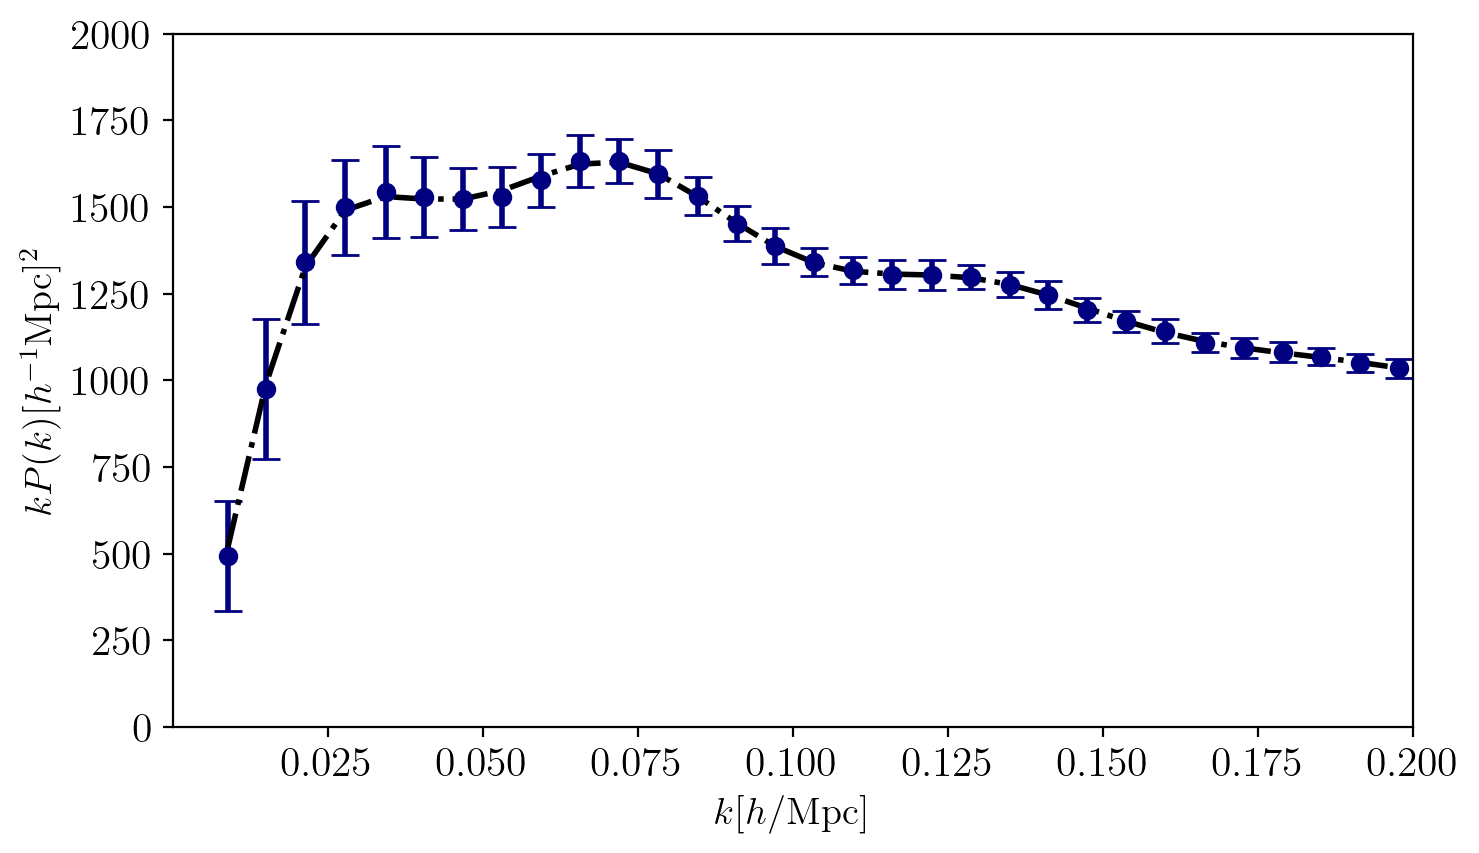

In [44]:
fig, axs = plt.subplots(1, figsize=(8,4.5))

axs.set_xlabel(r'$k[h/{\rm Mpc}]$', size = 14)
axs.set_ylabel(r'$k P(k) [h^{-1} \rm Mpc]^2$', size = 14)

axs.errorbar(kr, kr*pl0_data, yerr = kr*sigmal0_data, color = 'navy', ecolor='navy', fmt='o', 
             capsize = 5, lw = 2)

axs.plot(kr, kr*P0_best, color = 'k', lw = 2, ls = '-.')

axs.set_xlim([1e-4, 0.2])
axs.set_ylim([0, 2.0e3])

plt.show()

An MCMC exploration requires considerable computational time. However, in recent years, new techniques have been employed to speed up computations, including: 
- FFTLog, 
- Taylor expansion, 
- Emulators,
- Optimal Factorization of Cosmological Observables.

**Homework:** 

1. Repeat the fit, but now simultaneously fitting the monopole (already included) and quadrupole.

2. Repeat the fit, but now simultaneously fitting the monopole (already included), quadrupole, hexadecapole.

3. Repeat the point (1), but know using $k_{max} = 0.25\, h/{\rm Mpc}$

How do the results compare to the data?